# **Introduction**

Vinayaka Giriyapura Nagesh

Student Number:260881

The objective of this project is to assist in the development of devices and/or software that can assess the type of physical activity performed by an individual and provide actionable insights using the Physical Activity Monitoring dataset.

It includes data from 18 various physical activities (such as walking, cycling, and playing soccer) carried out by 9 people while wearing three inertial measurement units (IMU) and a heart rate monitor.This information is stored in separate text files for each subject. Each file's row represents one reading and includes 54 properties (including timestamp, activity ID, heart rate and IMU sensory data). Only 12 of the 18 physical activities are protocol activities, and we will focus solely on these 12 activities. Our ultimate goal will be to create an appropriate machine learning model to predict which sort of physical activity a person is doing among these 12 activities.

The entire project is divided into three primary components.

1. Data loading, cleaning, and exploratory data analysis are the first steps.
2. Hypothesis testing for attribute relationships.
3. Supervised machine learning modeling to forecast the person's activity.

In [1]:
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import StratifiedKFold
import seaborn as sn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from IPython.display import display
sn.set()

In [2]:
list_of_files = ["C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject101.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject102.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject103.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject104.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject105.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject106.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject107.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject108.dat",
                 "C:\\Users\\User\\Downloads\\Dataset\\Dataset\\Protocol\\subject109.dat",]

In [3]:
# activity id dictonary is created according to the dataset
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

In [4]:
#In case we wish to extract the activity name from the numeric id, we can do so.
activity_id_reverse = {}
for key in activity_id.keys():
  value = activity_id.get(key)
  activity_id_reverse[value] = key

In [5]:
activity_id_reverse

{'transient': 0,
 'lying': 1,
 'sitting': 2,
 'standing': 3,
 'walking': 4,
 'running': 5,
 'cycling': 6,
 'Nordic walking': 7,
 'watching TV': 9,
 'computer work': 10,
 'car driving': 11,
 'ascending stairs': 12,
 'descending stairs': 13,
 'vacuum cleaning': 16,
 'ironing': 17,
 'folding laundry': 18,
 'house cleaning': 19,
 'playing soccer': 20,
 'rope jumping': 24}

In [6]:
#developing the data's column name
col_names=['timestamp', 'activity_id', 'heart_rate']

IMU_locations = ['hand', 'chest', 'ankle']
IMU_data = ['tmp', 'acc_16_01', 'acc_16_02', 'acc_16_03',
            'acc_06_01', 'acc_06_02', 'acc_06_03',
            'gyr_01', 'gyr_02', 'gyr_03',
            'mag_01', 'mag_02', 'mag_03',
            'ori_01', 'ori_02', 'ori_03', 'ori_04']

In [7]:
colnames = col_names+ [j+'_'+i  for i in IMU_locations for j in IMU_data]
colnames

['timestamp',
 'activity_id',
 'heart_rate',
 'tmp_hand',
 'acc_16_01_hand',
 'acc_16_02_hand',
 'acc_16_03_hand',
 'acc_06_01_hand',
 'acc_06_02_hand',
 'acc_06_03_hand',
 'gyr_01_hand',
 'gyr_02_hand',
 'gyr_03_hand',
 'mag_01_hand',
 'mag_02_hand',
 'mag_03_hand',
 'ori_01_hand',
 'ori_02_hand',
 'ori_03_hand',
 'ori_04_hand',
 'tmp_chest',
 'acc_16_01_chest',
 'acc_16_02_chest',
 'acc_16_03_chest',
 'acc_06_01_chest',
 'acc_06_02_chest',
 'acc_06_03_chest',
 'gyr_01_chest',
 'gyr_02_chest',
 'gyr_03_chest',
 'mag_01_chest',
 'mag_02_chest',
 'mag_03_chest',
 'ori_01_chest',
 'ori_02_chest',
 'ori_03_chest',
 'ori_04_chest',
 'tmp_ankle',
 'acc_16_01_ankle',
 'acc_16_02_ankle',
 'acc_16_03_ankle',
 'acc_06_01_ankle',
 'acc_06_02_ankle',
 'acc_06_03_ankle',
 'gyr_01_ankle',
 'gyr_02_ankle',
 'gyr_03_ankle',
 'mag_01_ankle',
 'mag_02_ankle',
 'mag_03_ankle',
 'ori_01_ankle',
 'ori_02_ankle',
 'ori_03_ankle',
 'ori_04_ankle']

In [8]:
#Loading all of the individual files into a single dataframe
df_raw = pd.DataFrame() 
for i in list_of_files : 
  int_data = pd.read_table(i , names = colnames, sep = '\s+')
  int_data['SubjectID'] = int(i[-5])
  df_raw = df_raw.append(int_data, ignore_index = True)

C:\Users\User\AppData\Local\Temp\ipykernel_13320\3968507171.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
C:\Users\User\AppData\Local\Temp\ipykernel_13320\3968507171.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
C:\Users\User\AppData\Local\Temp\ipykernel_13320\3968507171.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
C:\Users\User\AppData\Local\Temp\ipykernel_13320\3968507171.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, i

In [9]:
#The initial raw dataframe
pd.set_option('display.max_columns',None)
df_raw

,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,acc_06_01_hand,acc_06_02_hand,acc_06_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,ori_01_hand,ori_02_hand,ori_03_hand,ori_04_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,acc_06_01_chest,acc_06_02_chest,acc_06_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,ori_01_chest,ori_02_chest,ori_03_chest,ori_04_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,acc_06_01_ankle,acc_06_02_ankle,acc_06_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,ori_01_ankle,ori_02_ankle,ori_03_ankle,ori_04_ankle,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.475210,-0.028917,0.806540,20.7931,-34.9954,-34.17720,0.555545,-0.596490,0.299264,0.495995,32.3750,2.722810,

I'm eliminating the data from the accelerometer with a scale: of ±6g because it gets saturated sometimes owing to heavy impacts induced by specific actions (e.g., running) with acceleration greater than 6g. Instead, we can use accelerometer data with a scale: of ±16g. I'm also eliminating the orientation data because it's no longer useful for predicting activities.

In [10]:
drop_columns = ['acc_06_01_hand','acc_06_02_hand','acc_06_03_hand','ori_01_hand','ori_02_hand','ori_03_hand','ori_04_hand','acc_06_01_chest','acc_06_02_chest','acc_06_03_chest','ori_01_chest','ori_02_chest','ori_03_chest','ori_04_chest','acc_06_01_ankle','acc_06_02_ankle','acc_06_03_ankle','ori_01_ankle','ori_02_ankle','ori_03_ankle','ori_04_ankle']

In [11]:
df_raw1 = df_raw.drop(drop_columns, axis = 1)

In [12]:
df_raw1.isnull().sum()

timestamp                0
activity_id              0
heart_rate         2610265
tmp_hand             13141
acc_16_01_hand       13141
acc_16_02_hand       13141
acc_16_03_hand       13141
gyr_01_hand          13141
gyr_02_hand          13141
gyr_03_hand          13141
mag_01_hand          13141
mag_02_hand          13141
mag_03_hand          13141
tmp_chest             3563
acc_16_01_chest       3563
acc_16_02_chest       3563
acc_16_03_chest       3563
gyr_01_chest          3563
gyr_02_chest          3563
gyr_03_chest          3563
mag_01_chest          3563
mag_02_chest          3563
mag_03_chest          3563
tmp_ankle            11749
acc_16_01_ankle      11749
acc_16_02_ankle      11749
acc_16_03_ankle      11749
gyr_01_ankle         11749
gyr_02_ankle         11749
gyr_03_ankle         11749
mag_01_ankle         11749
mag_02_ankle         11749
mag_03_ankle         11749
SubjectID                0
dtype: int64

According to the data source, the Heart Rate Monitor has a frequency of 9hz, and the IMU (Inertial Measuring Device) has a frequency of 100Hz. This means that 90% of the data we collected will be devoid of the Heart Rate measurement. We don't need 90% of the data that doesn't include heart rate measurements, though. Because, among the 12 activities listed, running and rope jumping is the most strenuous, and 9Hz is still sufficient to capture all of the fluctuations in IMU data (acceleration oscillations and the angular velocity oscillations)Because the world's fastest runner employs fewer than four oscillations of his hands and ankles every second https://posemethod.com/usain-bolts-running-technique/ and the world's quickest skipper employs fewer than seven oscillations every second https://jumpropehub.com/world-jump-rope-record/ We also have adequate data even with a frequency of 9hz.

As a result, we may safely dismiss the data without the heart rate measurement, reducing the time step to about 0.1 second rather than 0.01. Since the missing values make up roughly 90% of the data $\cfrac{2610265}{2872533}*100$, we may again safely discard the missing data. However, there may be a minor number of additional missing heart rate measurements.

In [13]:
df_raw1 = df_raw1.dropna(subset = ['heart_rate'])
df_raw1

,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.58905,31.8125,0.238080,9.80003,-1.688960,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,30.3125,9.65918,-1.655690,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1
10,8.48,0,104.0,30.0000,2.29745,8.90450,3.46984,-0.015370,-0.065894,-0.026322,15.13100,-68.8051,-5.47408,31.8125,0.237283,9.49881,-1.688000,-0.004998,0.010533,-0.009726,0.216756,-50.1418,42.6747,30.3125,9.77736,-1.582070,0.093906,0.078900,0.002283,0.020352,-61.5302,-38.72400,-58.386000,1
21,8.59,0,104.0,30.0000,2.40867,9.16819,3.35516,0.032015,0.017456,-0.006301,15.68850,-68.4006,-5.59184,31.8125,0.204242,9.68823,-1.534330,0.020125,-0.009126,-0.008258,0.280342,-51.9318,42.6733,30.3125,9.62446,-1.770320,0.016327,0.004046,0.005791,0.021763,-61.0729,-39.50910,-58.645700,1
32,8.70,0,104.0,30.0000,2.18114,8.86676,3.39125,0.073080,0.038494,0.002435,14.45490,-68.7615,-5.81306,31.8125,0.278383,9.76278,-1.610670,0.012105,0.020507,-0.013924,-0.209844,-50.9097,42.6672,30.3750,9.62306,-1.617800,-0.061813,-0.009526,0.010042,-0.004228,-61.4205,-39.04750,-59.256800,1
43,8.81,0,104.0,30.0000,2.40681,8.71326,3.39515,-0.080054,0.025991,-0.019187,14.68560,-69.1072,-5.35651,31.8125,0.239870,9.61228,-1.610880,-0.012182,-0.021782,0.003970,0.280518,-52.0492,43.2860,30.3750,9.73954,-1.657770,0.093988,0.025525,-0.013822,0.008244,-60.8480,-38.87130,-57.402900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872489,99.80,0,161.0,25.1875,-2.36226,10.75660,7.05010,0.771096,2.821600,-0.500235,6.41472,-18.8506,-49.99380,32.3750,1.450120,9.65272,-0.621063,0.320980,0.032811,0.774660,20.678000,-40.5791,11.2230,31.5000,9.53890,-1.060870,-3.114710,0.004010,-0.181098,-0.261212,-45.9456,6.51345,-0.604719,9
2872500,99.91,0,161.0,25.1875,-5.04845,11.03180,5.77734,0.455965,2.275130,0.045379,16.88010,-23.2536,-46.05130,32.3750,3.270390,9.89958,-2.215170,0.282894,0.141435,0.546708,17.161600,-40.8391,13.8791,31.5000,9.65186,-0.719538,-3.154260,0.089532,-0.090799,-0.268806,-45.5317,5.33578,-0.034568,9
2872511,100.02,0,161.0,25.1875,-6.37083,11.64810,5.63999,0.387395,1.711320,0.952960,24.08880,-26.2412,-41.32350,32.3750,2.411800,9.37958,-1.570780,0.067829,0.075997,0.244331,15.616300,-41.4275,14.4357,31.5000,9.54198,-0.681500,-3.078440,-0.093793,-0.039849,-0.012008,-46.5426,4.87121,-0.037586,9
2872522,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,0.901751,0.545959,1.242090,22.75650,-31.6272,-36.69500,32.3750,3.370840,9.11458,-1.320210,-0.165396,-0.371275,-0.000035,14.462900,-41.7718,14.4296,31.5000,9.57182,-0.869653,-3.308510,-0.041527,-0.099871,-0.122716,-45.6598,5.21258,-0.318540,9


In [14]:
df_raw1.isnull().sum()

timestamp             0
activity_id           0
heart_rate            0
tmp_hand           1195
acc_16_01_hand     1195
acc_16_02_hand     1195
acc_16_03_hand     1195
gyr_01_hand        1195
gyr_02_hand        1195
gyr_03_hand        1195
mag_01_hand        1195
mag_02_hand        1195
mag_03_hand        1195
tmp_chest           295
acc_16_01_chest     295
acc_16_02_chest     295
acc_16_03_chest     295
gyr_01_chest        295
gyr_02_chest        295
gyr_03_chest        295
mag_01_chest        295
mag_02_chest        295
mag_03_chest        295
tmp_ankle          1016
acc_16_01_ankle    1016
acc_16_02_ankle    1016
acc_16_03_ankle    1016
gyr_01_ankle       1016
gyr_02_ankle       1016
gyr_03_ankle       1016
mag_01_ankle       1016
mag_02_ankle       1016
mag_03_ankle       1016
SubjectID             0
dtype: int64

There are some missing values in the other columns after deleting the rows with missing HR values. By using the "nearest" or "linear" methods of data interpolation, the missing values can be filled in. Because the frequency at which the data is gathered is high in comparison to the likely complex harmonic oscillation frequency of the body part during vigorous body motions, one of the following methods will be enough for interpolation.

In addition, I retained the activities exactly as they are documented on the 'performedActivitiesSummary.pdf' file that was provided along with the data source.

In [15]:
drop_index = []

#Getting indexes of activity 0
drop_index += list(df_raw1.index[df_raw1['activity_id']==0])

#Keep only activities as documented on file "PerformedActivitiesSummary.pdf"
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==1) & (df_raw1['activity_id'].isin([10,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==2) & (df_raw1['activity_id'].isin([9,10,11,18,19,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==3) & (df_raw1['activity_id'].isin([5,6,7,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==4) & (df_raw1['activity_id'].isin([5,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==5) & (df_raw1['activity_id'].isin([9,11,18,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==6) & (df_raw1['activity_id'].isin([9,11,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==7) & (df_raw1['activity_id'].isin([9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==8) & (df_raw1['activity_id'].isin([9,11]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==9) & (df_raw1['activity_id'].isin([1,2,3,4,5,6,7,9,11,12,13,16,17]))])

df_raw1 = df_raw1.drop(drop_index)

In [16]:
#interpolating the data 
df_raw1 =df_raw1.interpolate(limit_direction = 'both')

In [17]:
df_raw1.head(6)

,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,SubjectID
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,9.14612,-67.3936,-20.5508,32.1875,0.125825,9.72560,-1.61331,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.6495,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,9.69163,-67.0898,-21.2481,32.1875,0.199567,9.64954,-1.68917,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.1765,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,9.58694,-67.0882,-20.8997,32.1875,0.279626,9.80069,-1.57205,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.2943,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,8.59622,-67.1486,-20.1947,32.1875,0.428255,9.64882,-1.68503,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.6836,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1
2987,38.25,1,101.0,30.375,2.54954,7.63122,5.55623,-0.487667,-0.019958,-0.089500,9.00159,-66.0543,-22.5021,32.2500,0.239969,9.64994,-1.61100,0.018251,-0.001223,0.004039,1.044890,-51.2971,43.7889,30.75,9.66059,-1.80820,-0.021657,0.005473,-0.003154,0.025621,-60.5521,-36.5522,-58.3708,1


We may calculate the resultant acceleration and angular velocity for each hand, chest, and ankle independently, and then create new columns with the individual acceleration and angular velocity measurements dropped into each axis. Furthermore, if our goal is just to determine which activity the person is undertaking, the magnetic field measurement is ineffective since there are no activities in the given set of activities that interfere with the magnetic field, implying that the magnetic field measurement is dependent on the location in which the person is performing the activity (Earth's Magnetic field) but not on the activity itself.

The resultant acceleration is given by

1.$a_{(res)}$=$$\sqrt{(a^2_{x}+a^2_{y}+a^2_{z})}$$

and the resultant angular velocity is given by

2.$w_{(res)}$=$$\sqrt{(w^2_{x}+w^2_{y}+w^2_{z})}$$




In [18]:
#calculating the resultant acceleration and angular velocity of the hand, chest, and ankle
df_raw1['acc_hand'] = ((df_raw1.acc_16_01_hand**2)+(df_raw1.acc_16_02_hand**2)+(df_raw1.acc_16_03_hand**2))**0.5
df_raw1['acc_chest'] = ((df_raw1.acc_16_01_chest**2)+(df_raw1.acc_16_02_chest**2)+(df_raw1.acc_16_03_chest**2))**0.5
df_raw1['acc_ankle'] = ((df_raw1.acc_16_01_ankle**2)+(df_raw1.acc_16_02_ankle**2)+(df_raw1.acc_16_03_ankle**2))**0.5
df_raw1['gyr_hand'] = ((df_raw1.gyr_01_hand**2)+(df_raw1.gyr_02_hand**2)+(df_raw1.gyr_03_hand**2))**0.5
df_raw1['gyr_chest'] = ((df_raw1.gyr_01_chest**2)+(df_raw1.gyr_02_chest**2)+(df_raw1.gyr_03_chest**2))**0.5
df_raw1['gyr_ankle'] = ((df_raw1.gyr_01_ankle**2)+(df_raw1.gyr_02_ankle**2)+(df_raw1.gyr_03_ankle**2))**0.5

In [19]:
#deleting all individual observations of acceleration, angular velocity, and magnetic field
to_drop = ['acc_16_01_hand','acc_16_02_hand','acc_16_03_hand','acc_16_01_ankle','acc_16_02_ankle','acc_16_03_ankle','acc_16_01_chest','acc_16_02_chest','acc_16_03_chest','gyr_01_hand','gyr_02_hand','gyr_03_hand','gyr_01_chest','gyr_02_chest','gyr_03_chest','gyr_01_ankle','gyr_02_ankle','gyr_03_ankle','mag_01_hand','mag_02_hand','mag_03_hand','mag_01_chest','mag_02_chest','mag_03_chest','mag_01_ankle','mag_02_ankle','mag_03_ankle']
df_raw2 = df_raw1.drop(to_drop, axis = 1)
df_raw2

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
2932,37.70,1,100.0,30.375,32.1875,30.75,1,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
2943,37.81,1,100.0,30.375,32.1875,30.75,1,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2954,37.92,1,100.0,30.375,32.1875,30.75,1,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
2965,38.03,1,100.0,30.375,32.1875,30.75,1,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
2976,38.14,1,101.0,30.375,32.1875,30.75,1,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,32.3750,31.50,9,10.876780,9.884364,10.063054,0.157022,0.100384,0.037724
2871986,94.77,24,162.0,25.125,32.3750,31.50,9,10.341491,9.895226,9.792079,0.458881,0.162803,0.010443
2871997,94.88,24,162.0,25.125,32.3750,31.50,9,10.021582,9.915689,9.809462,0.415535,0.310067,0.051387
2872007,94.98,24,162.0,25.125,32.3750,31.50,9,9.932805,10.178812,9.947890,0.388336,0.322284,0.042514


Because there is a possibility of data mislabeling during the transition from one activity to another, and because it takes some time for the body temperature and heart rate to rise, let us delete 5 seconds from the data during the transition from one activity to another.

In [20]:
freq = 5
df_raw2['activity_block'] = ((df_raw2['activity_id'].shift(1) != df_raw2['activity_id']) | (df_raw2['SubjectID'].shift(1) != df_raw2['SubjectID'])).astype(int).cumsum() #will count each change either when acitvity or the subject changes and make cumilative sum and saved as a row in the data frame
drop_index = []
numblocks = df_raw2['activity_block'].max() #for the total number of change
for block in range(1, numblocks+1):# For every change in activity or subject in the data frame, 50 rows (equal to five seconds) are added to the droplist.
    drop_index += list(df_raw2[df_raw2['activity_block']==block].head(10 * freq).index)
    drop_index += list(df_raw2[df_raw2['activity_block']==block].tail(10 * freq).index)
    
df_raw3 = df_raw2.drop(drop_index)#The rows in the droplist are eliminated, removing 5 seconds from each shift of activities.
df_raw3.drop(['activity_block'], axis = 1, inplace  = True)
df_raw3.reset_index(drop = True, inplace = True)
df_raw3

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
0,43.17,1,102.0,30.4375,32.250,30.8125,1,9.832157,9.792297,9.958010,1.908494,0.059530,0.074861
1,43.28,1,102.0,30.4375,32.250,30.8125,1,11.045495,9.510419,9.977333,0.900625,0.131829,0.066594
2,43.39,1,102.0,30.5000,32.250,30.8125,1,11.141402,10.106045,9.895070,0.324766,0.144188,0.035784
3,43.50,1,102.0,30.5000,32.250,30.8125,1,8.874493,9.695632,9.893858,0.268974,0.210121,0.042391
4,43.61,1,102.0,30.5000,32.250,30.8125,1,8.960823,10.033386,9.895915,0.397257,0.115285,0.039770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166779,89.19,24,160.0,25.1250,32.375,31.4375,9,11.828910,12.775177,30.190353,2.836380,0.753854,4.209032
166780,89.30,24,160.0,25.1250,32.375,31.4375,9,6.795050,6.850496,8.385079,2.912225,0.372828,4.725465
166781,89.41,24,160.0,25.1250,32.375,31.4375,9,8.970190,5.449755,12.458722,1.929626,0.695344,1.471554
166782,89.52,24,160.0,25.1250,32.375,31.4375,9,31.453081,36.280554,19.680311,4.938612,1.718190,3.895796


# **Exploratory Data Analysis (EDA)**

Let's examine the data in greater detail to derive insights from it. The data is further divided into test and train data for this purpose. We will do EDA on train data and hypothesis testing on test data.

In [21]:
# The cleaned data is jumbled and divided into test and train data.
df_train = df_raw3.sample(frac=0.8, random_state=1)
df_test = df_raw3.drop(df_train.index)

In [22]:
df_train

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
124502,157.83,1,64.0,30.5625,33.1875,30.4375,7,9.805579,9.767448,10.114765,0.023953,0.067994,0.057775
1427,199.25,1,79.0,31.4375,33.2500,31.8750,1,9.752365,9.879379,10.082673,2.784590,0.571369,0.699030
92999,2310.92,4,113.0,34.4375,38.1250,33.9375,5,12.605002,12.079082,19.892883,3.637550,0.988615,3.612159
120233,3016.25,6,101.0,29.7500,35.3125,34.3125,6,8.319747,10.908893,12.520387,1.795388,0.949867,1.934323
153391,1329.33,16,103.0,34.7500,38.2500,34.6875,8,10.743789,10.523606,10.089589,2.964380,0.335319,0.479354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139588,2527.44,7,116.0,33.0625,38.3125,32.3750,7,9.772055,11.115637,19.225091,1.847289,0.322401,1.901602
150582,905.50,17,92.0,34.6875,37.7500,34.5625,8,10.161829,9.799903,9.920666,0.942628,0.199273,0.090217
47670,667.09,2,71.0,32.0000,34.9375,32.8750,3,9.923017,9.901360,9.860430,0.053348,0.062578,0.035299
64580,772.39,3,100.0,33.2500,35.2500,33.9375,4,9.917020,9.420091,9.812011,1.373326,0.268670,0.085868


In [23]:
df_train.describe()

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
count,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000
mean,1698.388192,7.996073,107.120793,32.751313,36.174481,33.711142,4.564428,11.049918,10.211539,12.522755,1.565010,0.534557,1.493613
std,1096.164898,6.163923,26.804442,1.790820,1.491560,1.089207,2.333697,5.830115,3.957867,7.924119,1.735186,0.594673,1.934475
min,36.730000,1.000000,57.000000,24.937500,31.937500,30.062500,1.000000,0.278204,0.175333,0.326540,0.001588,0.001402,0.001288
25%,735.695000,3.000000,86.000000,31.625000,35.187500,33.000000,2.000000,9.415848,9.438582,9.859457,0.200905,0.106406,0.063121
50%,1451.780000,6.000000,104.000000,33.125000,36.437500,34.062500,5.000000,9.805265,9.828139,10.059958,1.043889,0.386504,0.640220
75%,2668.590000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.429258,10.481646,12.053330,2.312153,0.722401,2.251436
max,4240.180000,24.000000,201.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,236.787687,19.163110,15.775153,14.580009


According to the train data, the average heart rate is approximately $107/min$ and the maximum is around $201/min$. The maximum temperature measured in the chest is $38.5$ degrees Celsius, between the hand, chest, and ankle. The ankle has the highest mean acceleration $(12.5m^{2}/sec)$ and the highest mean angular velocity $(1.56rad/sec)$.

To visualise the distribution of the Heart rate and IMU sensor data, delete the activity id, SubjectID, and timestamp columns.

In [24]:
df_final = df_raw3.drop(['activity_id','SubjectID','timestamp'],axis = 1)

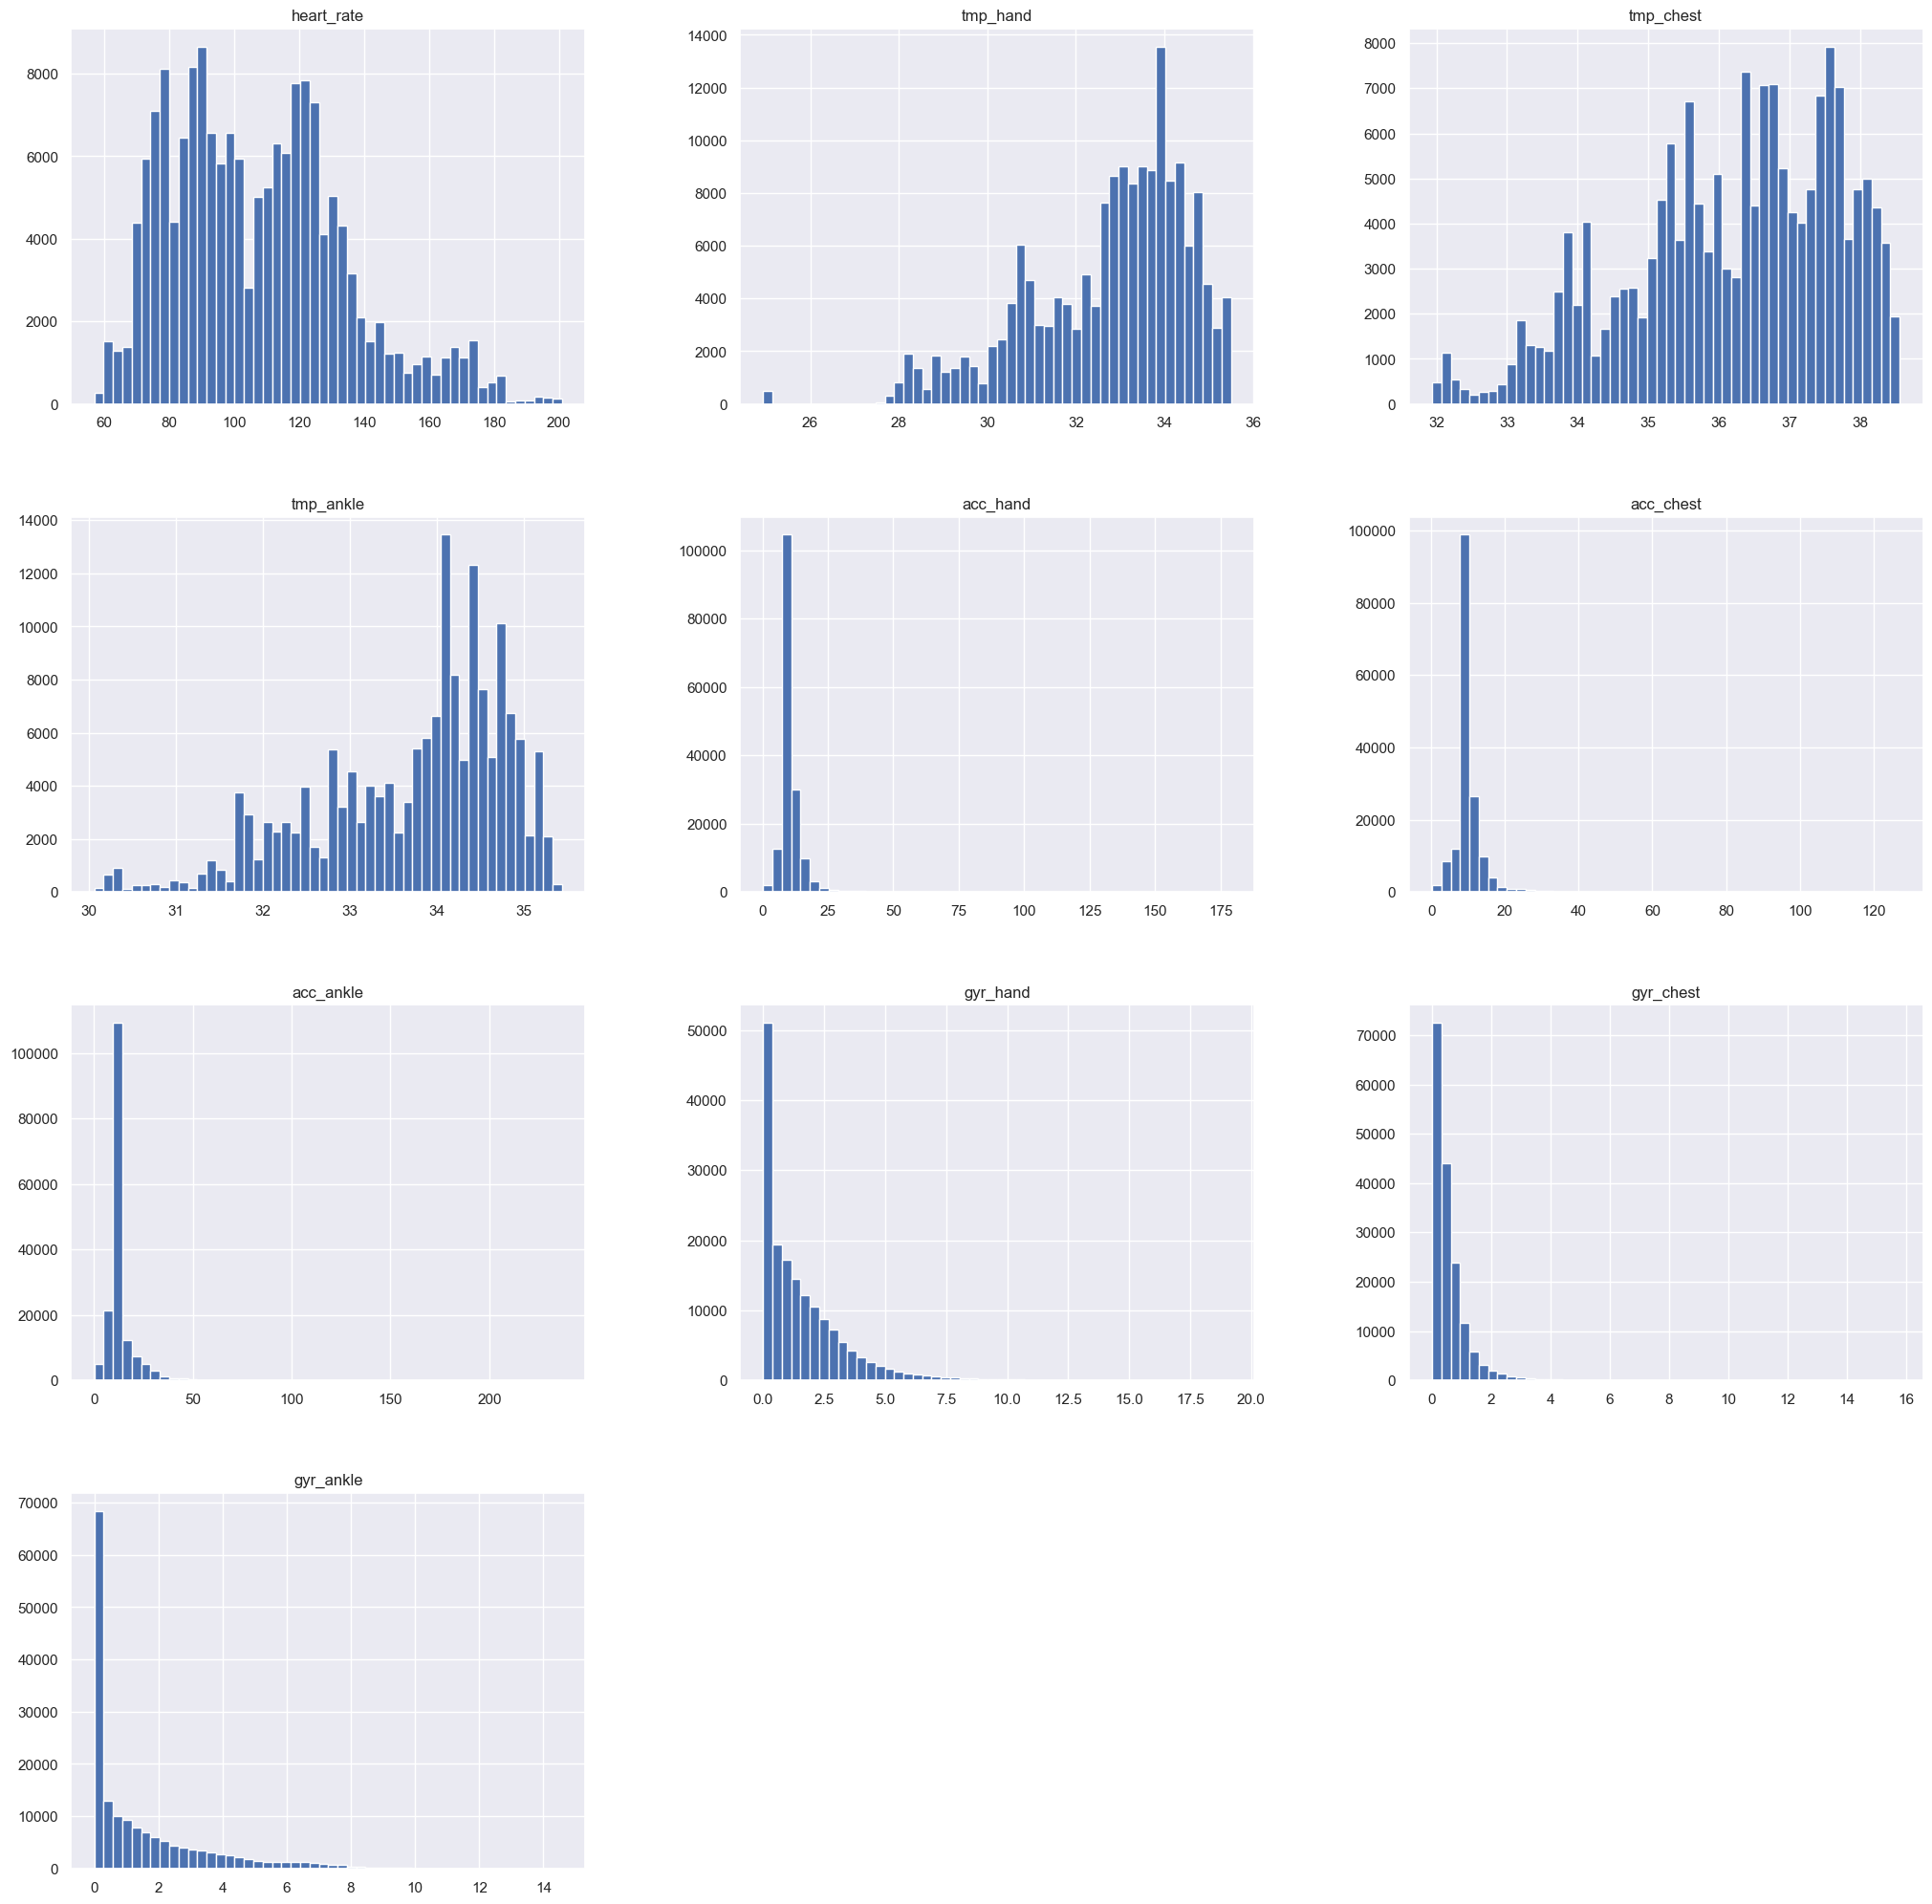

In [25]:
df_final.hist(figsize = (25,25), bins = 50)
plt.show()

The majority of the attributes have a non-normal distribution. However, because the sample size is large (including the test data), we can confidently do a t-test later. There appear to be outliers in the hand temperature data collection, however, because the data is input by sensors, there is a probability that it is tied to some specific action, so I am not eliminating those outliers. The mean of the acceleration values is around 9.81, which explains why the accelerometer measures the acceleration due to gravity at rest, which is around 9.81. https://en.wikipedia.org/wiki/Talk%3AAccelerometer.

Furthermore, the mode of gyroscope data is close to zero, indicating that the angular acceleration of body components is close to zero the majority of the time

Now let's analyze different attributes individually

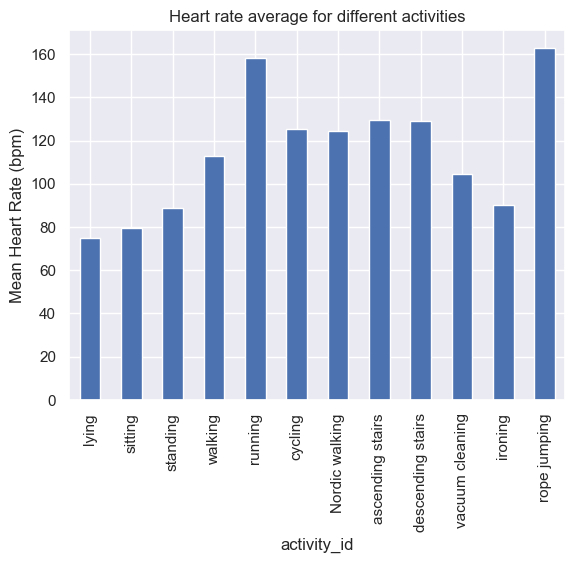

In [26]:
sn.set()
df_HR_mean =df_train['heart_rate'].groupby(df_train['activity_id']).mean()#gathering heart rate data based on activity id and calculating the mean heart rate for each activity
df_HR_mean.index = df_HR_mean.index.map(activity_id)# to get the real activity id as index
df_HR_mean.plot(kind = 'bar')
plt.ylabel("Mean Heart Rate (bpm)")
plt.title('Heart rate average for different activities')
plt.show()

The above bar chart shows that for physically easy tasks (for a typical human) like sitting, lying, standing, and ironing, the average heart rate is on the lower spectrum, near to the normal heart rate of $72bpm$. But, slightly physically demanding activities such as cycling, Nordic Walking, and ascending and descending stairs have an average heart rate of more than 120bpm. The typical heart rate during strenuous sports involving vigourous movement of body parts, such as jogging and rope jumping, is over $150bpm$.

Rope jumping has the greatest average heart rate ($160bpm$) among the 12 activities, while lying has the lowest ( $75bpm$ ).

**Acceleration analysis**

In [27]:
# finding the average acceleration for the hand, chest, and ankle
df_Acc_hand_mean = df_train['acc_hand'].groupby(df_train['activity_id']).mean() - 9.81 # 9.81(accelartion due to gravity) is lowered so that when plotting it gives a clearer indication of the strength of the body part's movement
df_Acc_chest_mean = df_train['acc_chest'].groupby(df_train['activity_id']).mean() - 9.81
df_Acc_ankle_mean = df_train['acc_ankle'].groupby(df_train['activity_id']).mean() - 9.81

df_Acc_hand_mean.index = df_Acc_hand_mean.index.map(activity_id)
df_Acc_chest_mean.index = df_Acc_chest_mean.index.map(activity_id)
df_Acc_ankle_mean.index = df_Acc_ankle_mean.index.map(activity_id)

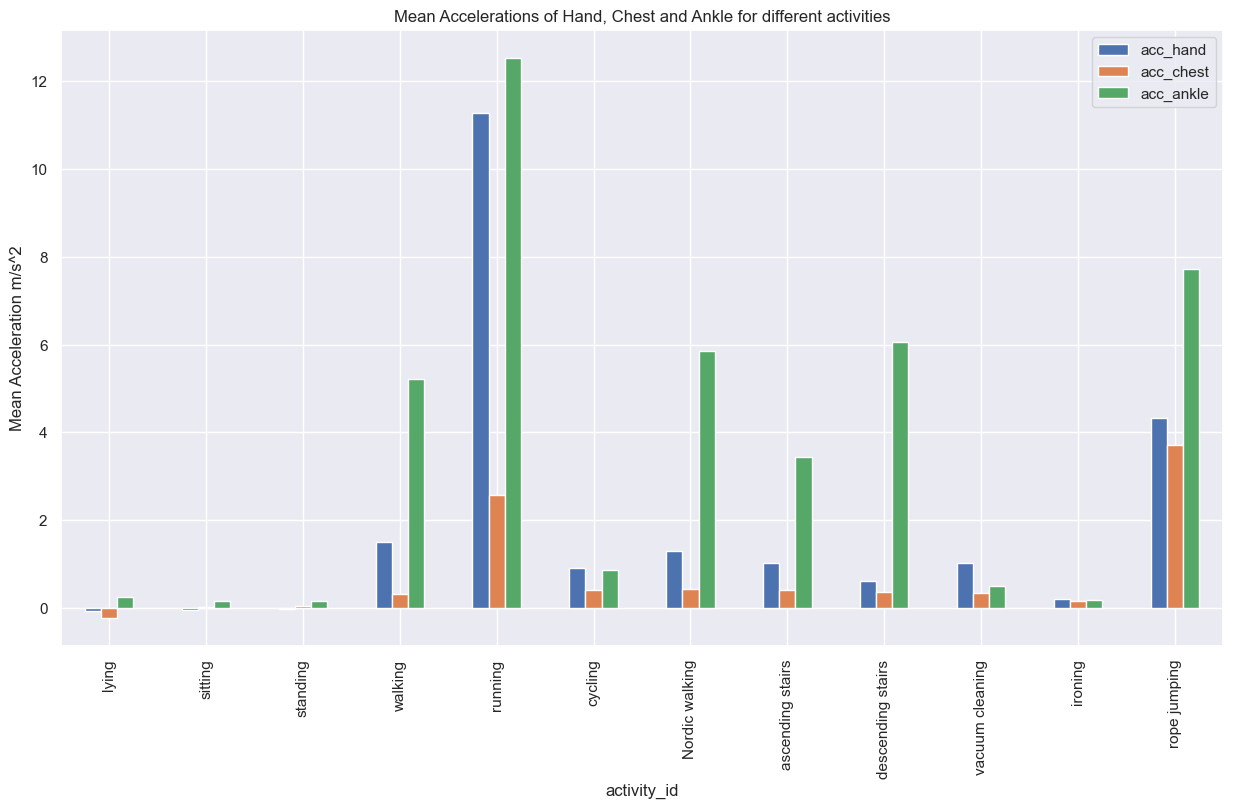

In [28]:
df_acc_mean = pd.concat([df_Acc_hand_mean,df_Acc_chest_mean,df_Acc_ankle_mean],axis = 1)# combining the various techniques to get a triple bar graph that can be plotted in the same plot.
df_acc_mean.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Mean Acceleration m/s^2')
plt.title('Mean Accelerations of Hand, Chest and Ankle for different activities')
plt.show()

Physically non-demanding activities (sleeping, sitting, standing, ironing) show very low mean acceleration of distinct body parts, as expected. However, physically demanding activities such as running and rope jumping have a significantly higher mean acceleration value for the ankle and hand. Walking, Nordic walking, rising and descending stairs, and cycling are examples of activities involving significant leg movements.

Except for rope jumping, practically all exercises have low chest acceleration.

**Angular velocity analysis**

In [29]:
# To find the hand,chest and ankle average angular velocity
df_gyr_hand_max = df_train['gyr_hand'].groupby(df_train['activity_id']).mean()
df_gyr_chest_max = df_train['gyr_chest'].groupby(df_train['activity_id']).mean()
df_gyr_ankle_max = df_train['gyr_ankle'].groupby(df_train['activity_id']).mean()

df_gyr_hand_max.index = df_gyr_hand_max.index.map(activity_id)
df_gyr_chest_max.index = df_gyr_chest_max.index.map(activity_id)
df_gyr_ankle_max.index = df_gyr_ankle_max.index.map(activity_id)

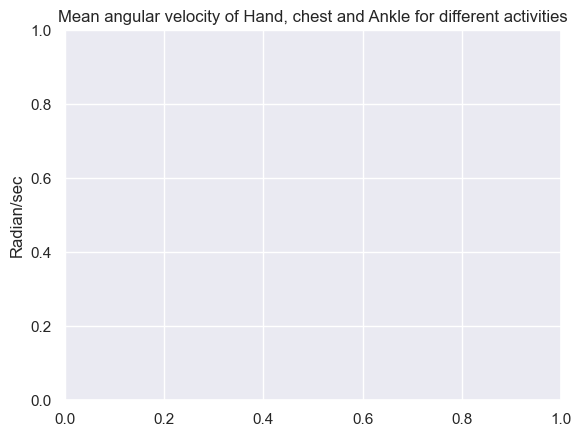

In [30]:
df_angular_vel_max = pd.concat([df_gyr_hand_max,df_gyr_chest_max,df_gyr_ankle_max],axis =1)# bringing the several means together so that they can be presented in the same plot as a triple bar graph.
plt.ylabel('Radian/sec')
plt.title('Mean angular velocity of Hand, chest and Ankle for different activities')
plt.show()

1. It is clear from the above bar chart that physically non-demanding activities have minimal angular velocity for each body part, except ironing, which has a significant mean angular acceleration in hand.

2. Running produces a high mean angular acceleration of 4.2 rad/sec for both the hand and the ankle. Rope jumping has the highest mean hand angular acceleration (4.5rad/sec), while the ankle acceleration is low in comparison to the hand.

3. Descending stairs have much higher mean ankle acceleration than ascending stairs.

In [31]:
list_activities = list(df_gyr_hand_max.index)# simply to obtain a list of 12 protocol-related actions
list_activities

['lying',
 'sitting',
 'standing',
 'walking',
 'running',
 'cycling',
 'Nordic walking',
 'ascending stairs',
 'descending stairs',
 'vacuum cleaning',
 'ironing',
 'rope jumping']

In [32]:
#To see how the temperature data described the hand for various activities
df_tmp_hand = df_train[['tmp_hand']].groupby(df_train['activity_id'])
k = df_tmp_hand.describe()
k.index = df_tmp_hand.describe().index.map(activity_id)# To change the index to the real index

In [33]:
k

tmp_hand                                                  \
                     count       mean       std      min      25%      50%   
activity_id                                                                  
lying              13454.0  32.727363  1.404591  30.1875  31.3125  32.8750   
sitting            12873.0  33.266478  1.102424  31.5000  32.1250  33.5000   
standing           13255.0  33.643172  0.854488  32.1875  33.0000  33.5625   
walking            16803.0  32.302830  1.371568  28.7500  31.3750  32.5625   
running             6616.0  30.792345  2.096444  27.9375  28.8125  30.8125   
cycling            11465.0  30.997710  1.991426  27.6250  29.3125  31.0000   
Nordic walking     13154.0  31.528654  1.747679  28.9375  30.3125  30.7500   
ascending stairs    7313.0  33.527990  0.870470  31.7500  32.5625  33.7500   
descending stairs   6367.0  33.319087  0.875995  31.6250  32.4375  33.5625   
vacuum cleaning    12179.0  34.181311  0.651642  33.0625  33.6875  34.1250   
ironing            16768.0  34.026459  0.774501  32.6250  33.4375  33.9375   
rope jumping        3180.0  29.751572  2.455088  24.9375  28.4375  30.1875   

                                     
                       75%      max  
activity_id                          
lying              33.8125  34.9375  
sitting            34.2500  35.0625  
standing           34.3750  35.2500  
walking            33.0625  34.8125  
running            33.8125  33.8750  
cycling            32.7500  34.6875  
Nordic walking     33.0000  34.9375  
ascending stairs   34.1250  35.1250  
descending stairs  33.8750  34.8750  
vacuum cleaning    34.6250  35.5000  
ironing            34.6875  35.4375  
rope jumping       30.8125  33.8750

The above data Frame shows that the temperature means is highest for vacuum cleaning, maybe due to the hot air generated by the machine. All other activities that are not physically demanding have a comparable mean temperature.

It is worth noting that for activities involving vigorous hand movement, the hand temperature is substantially lower than for other activities.

1.Rope jumping:$29.75^{∘}C$

2.Running: $30.79^{∘}C$

3.Cycling: $30.99^{∘}C$

The likely source of this observation could be due to the high air movement (normal temperature, unlike in vacuum cleaning) around the hand while performing these tasks, which could have resulted in a high heat-carrying rate from the hand by the air.

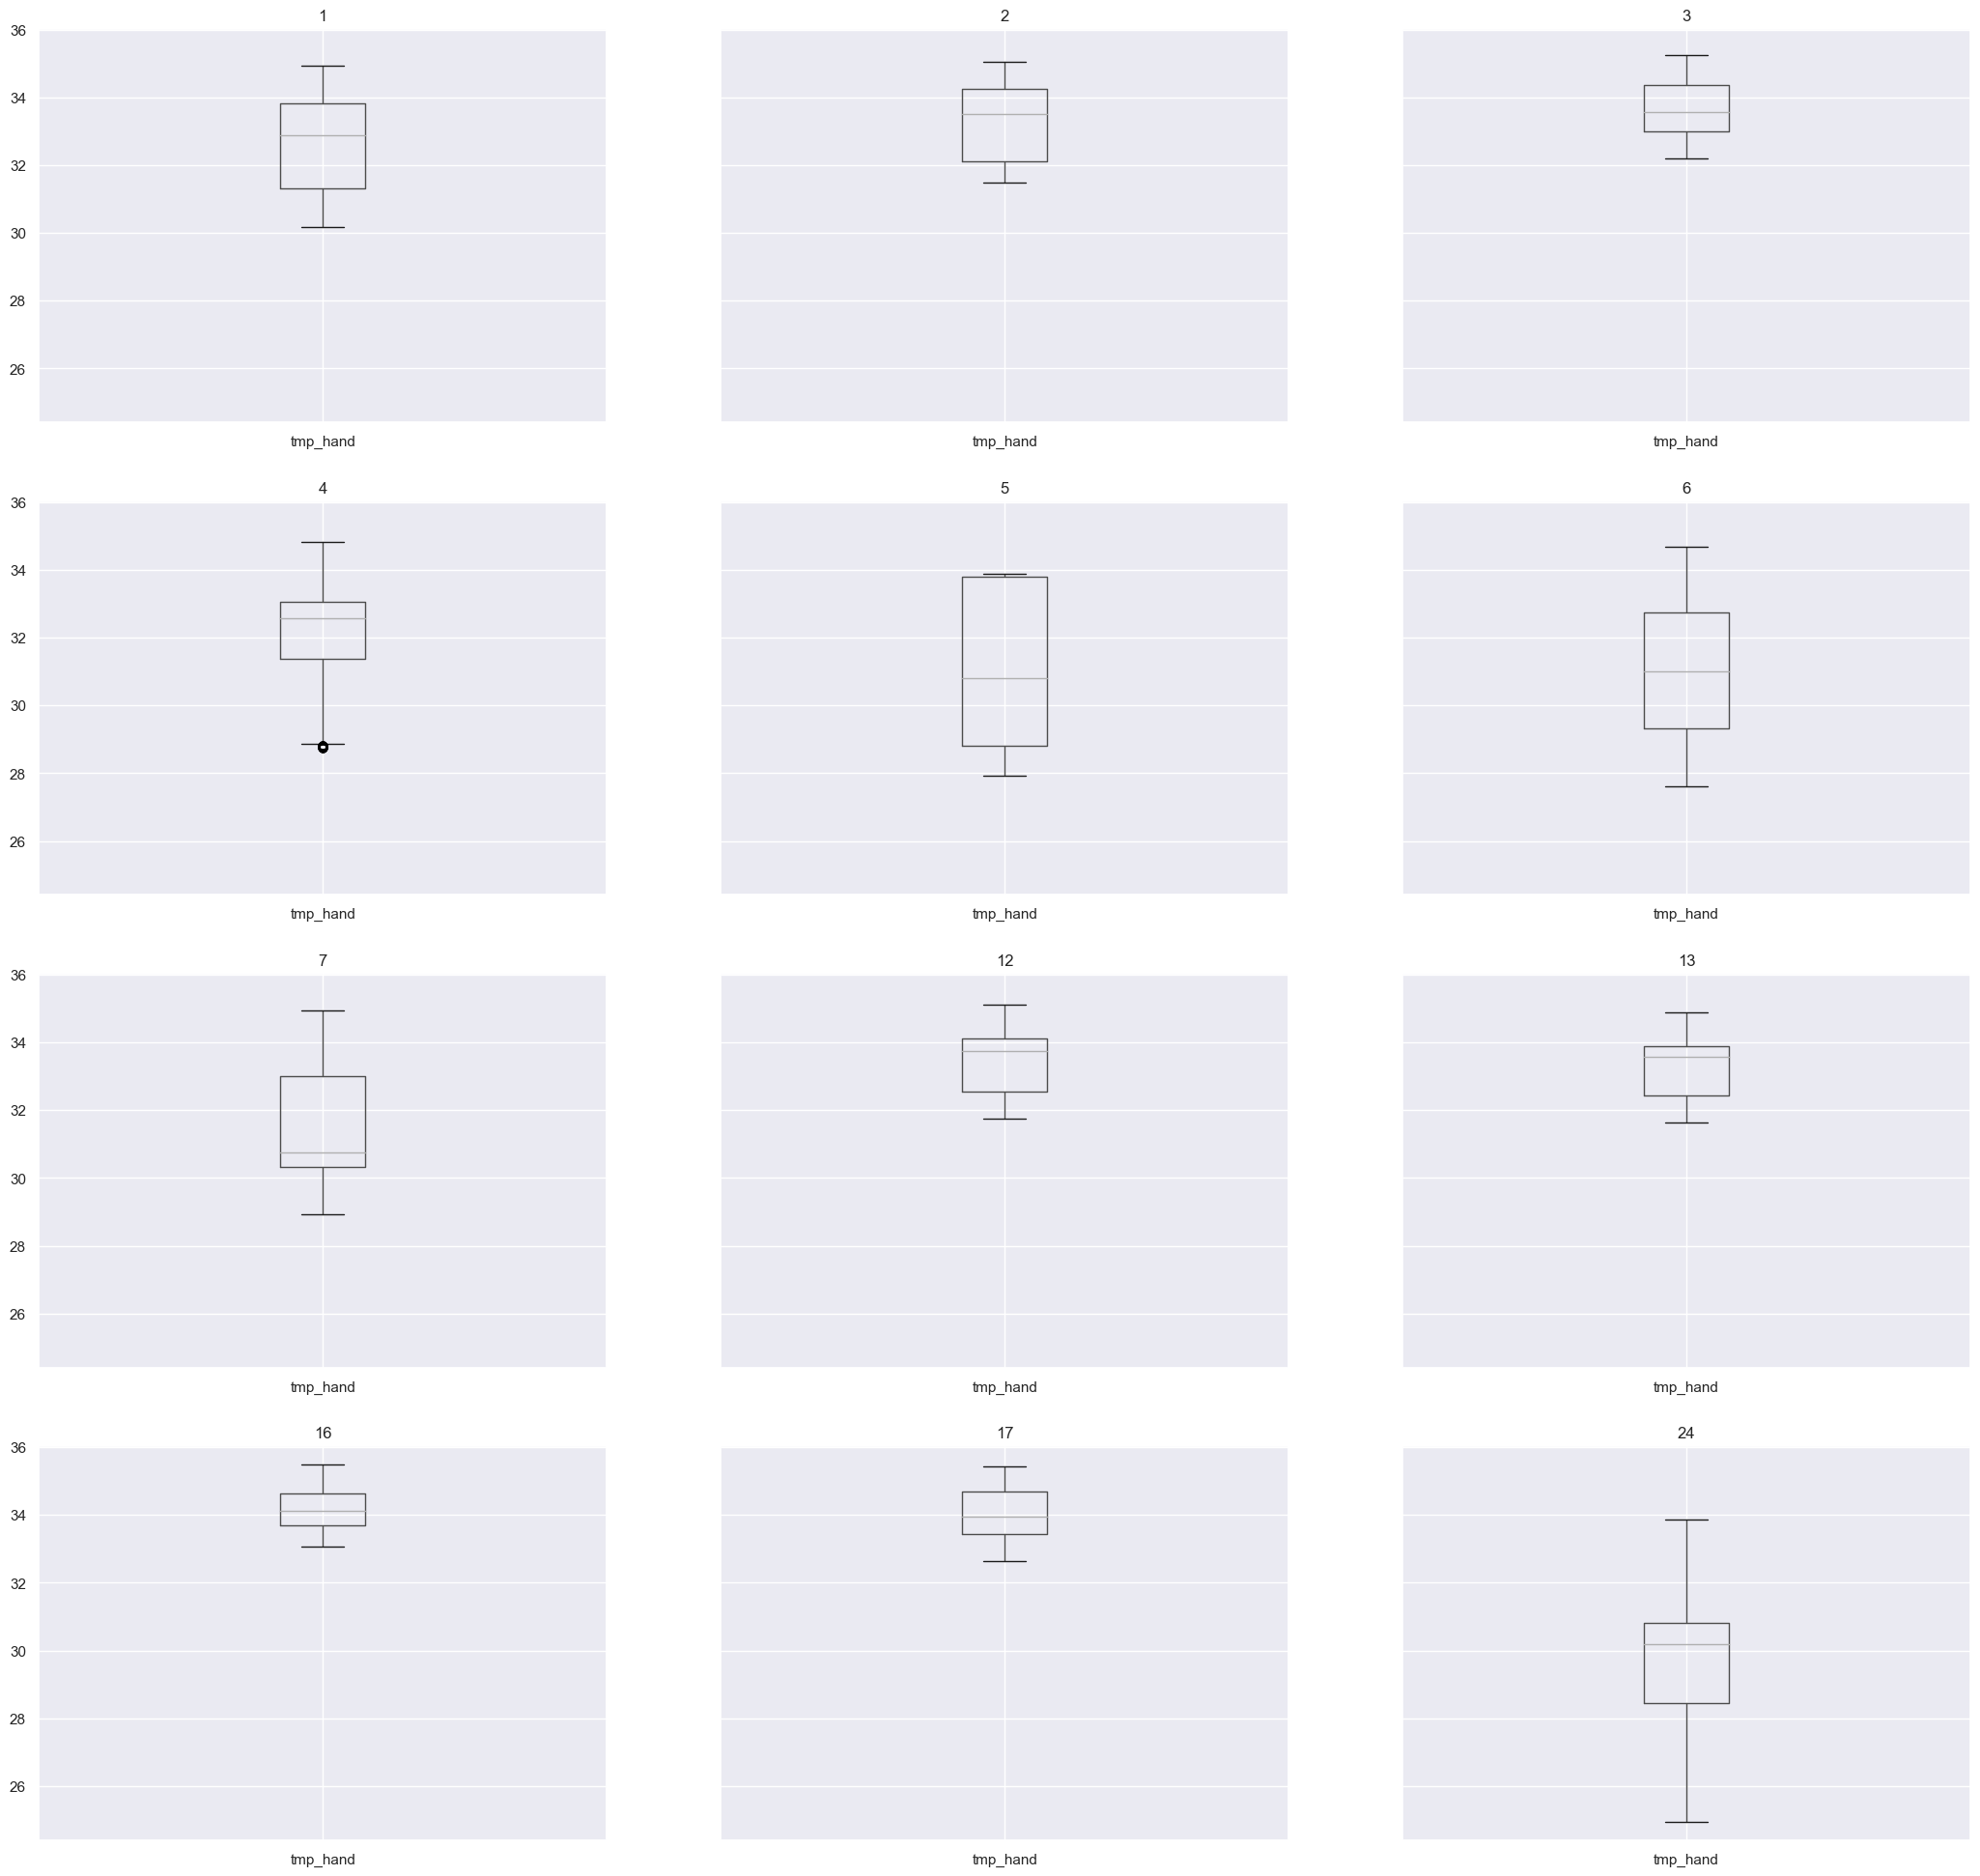

In [34]:
#Box plot of hand temperature variation during various activities
df_tmp_hand.boxplot(figsize = (25,25))
plt.show()

The above boxplot shows that the temperature varies the most for rope jumping (activity 24) and the least for vacuum cleaning (activity 16). The temperature variation is also lower when ironing (activity 17).

In [35]:
#Average sensor data values for various subject IDs
df_average =df_train.pivot_table(index = 'SubjectID')# pivoting the table wrt the subject ID
df_average1 =df_average.drop(["activity_id","timestamp"],axis = 1)
df_average1

,acc_ankle,acc_chest,acc_hand,gyr_ankle,gyr_chest,gyr_hand,heart_rate,tmp_ankle,tmp_chest,tmp_hand
SubjectID,,,,,,,,,,
1,12.852717,10.349247,11.278277,1.482593,0.599895,1.755001,122.122412,33.653086,35.223589,32.413188
2,12.234689,10.241069,10.863060,1.586608,0.611787,1.884836,109.152004,34.258991,36.333911,32.334617
3,11.865050,9.934454,10.730130,1.043837,0.405025,1.504964,94.069980,33.509978,35.777066,31.885546
4,11.711142,9.991532,10.311891,1.231305,0.467321,1.242908,109.147494,33.580857,35.123352,31.894387
5,12.984013,10.306983,11.147082,1.664904,0.559060,1.565724,108.099952,34.209415,37.442860,34.775655
6,12.684995,10.207488,12.025811,1.621959,0.621787,1.723947,102.710386,34.719021,35.822392,32.295891
7,12.517294,10.025140,10.412051,1.498710,0.417871,1.074302,96.308585,32.232302,36.759969,32.941411
8,12.876733,10.436470,11.344793,1.614339,0.521759,1.632943,109.350975,33.347641,36.701418,33.155389
9,19.252505,12.983880,14.603923,2.421016,1.108171,3.230483,148.465473,31.427749,32.242487,25.057705


Subject ID 9 has the highest mean values for all sensory data except temperature, with a very high mean heart rate of 148.46bpm. However, this information is heavily skewed because subject 9 has only participated in one protocol activity, rope jumping. Other contenders have similar heart rates if we solely consider rope jumping.

In [36]:
#Sensor data average value for various activities
df_average_activity = df_train.pivot_table(index = 'activity_id')#pivoting table wrt the activity id
df_average_activity.index  = df_average_activity.index.map(activity_id)
df_average_activity_new=df_average_activity.drop(['SubjectID'],axis = 1)
df_average_activity_new

,acc_ankle,acc_chest,acc_hand,gyr_ankle,gyr_chest,gyr_hand,heart_rate,timestamp,tmp_ankle,tmp_chest,tmp_hand
activity_id,,,,,,,,,,,
lying,10.060279,9.578504,9.725752,0.084575,0.085093,0.126573,75.104727,205.703536,32.975537,35.089890,32.727363
sitting,9.972249,9.820942,9.756177,0.091051,0.108635,0.229028,79.674435,506.954670,33.644164,35.830148,33.266478
standing,9.955005,9.837908,9.781892,0.116558,0.163810,0.388571,88.625424,733.169661,33.900453,36.166352,33.643172
walking,15.024392,10.113284,11.303542,3.036188,0.523465,2.814273,112.822353,2429.324117,33.839009,37.006141,32.302830
running,22.345557,12.384570,21.090850,4.412283,1.744831,4.315094,157.956771,3446.232337,33.160331,34.370768,30.792345
cycling,10.670248,10.218884,10.704182,1.255481,0.573903,0.815534,125.155953,3131.042837,33.170568,35.718551,30.997710
Nordic walking,15.656702,10.238068,11.109071,3.242735,0.579569,2.174587,124.300517,2905.742301,33.436307,36.150228,31.528654
ascending stairs,13.250245,10.219511,10.820882,2.166308,0.947454,2.335684,129.654998,1807.425661,34.166642,37.050065,33.527990
descending stairs,15.872006,10.174196,10.409700,3.122998,1.001569,1.984584,128.997487,1907.047790,34.178813,37.001865,33.319087


Again, the major takeaway from this table is that, except for temperature, all sensor data for the activity of rope jumping is at its maximum. Except for ankle acceleration and temperature, all sensor data for the activity lying is minimal.



Let us now investigate the relationship between all of the sensor data.

In [37]:
#removing unsuitable columns for correlation
df_train1 = df_train.drop(['SubjectID','activity_id','timestamp'],axis =1)

Because most sensor data distributions do not follow a normal distribution, we must utilize the Spearman correlation method to find the correlation.

In [38]:
df_train1.corr(method = 'spearman').style.background_gradient()

,heart_rate,tmp_hand,tmp_chest,tmp_ankle,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
heart_rate,1.000000,-0.350788,-0.038416,-0.060610,0.175093,0.084133,0.279892,0.635201,0.677574,0.735719
tmp_hand,-0.350788,1.000000,0.742656,0.506795,-0.119221,0.018365,-0.128357,-0.163575,-0.148192,-0.272813
tmp_chest,-0.038416,0.742656,1.000000,0.454020,-0.045145,0.070020,0.038284,0.128450,0.096187,0.130395
tmp_ankle,-0.060610,0.506795,0.454020,1.000000,-0.005031,0.045421,-0.046598,0.124971,0.075603,-0.012598
acc_hand,0.175093,-0.119221,-0.045145,-0.005031,1.000000,0.395884,0.171024,0.241500,0.216159,0.169837
acc_chest,0.084133,0.018365,0.070020,0.045421,0.395884,1.000000,0.207340,0.059642,0.128828,0.091379
acc_ankle,0.279892,-0.128357,0.038284,-0.046598,0.171024,0.207340,1.000000,0.206092,0.240517,0.387638
gyr_hand,0.635201,-0.163575,0.128450,0.124971,0.241500,0.059642,0.206092,1.000000,0.702384,0.681162
gyr_chest,0.677574,-0.148192,0.096187,0.075603,0.216159,0.128828,0.240517,0.702384,1.000000,0.704927
gyr_ankle,0.735719,-0.272813,0.130395,-0.012598,0.169837,0.091379,0.387638,0.681162,0.704927,1.000000


1. It can be seen from the above correlation data frame that there is a high correlation between all angular velocity measurements (hand, chest, and ankle) and heart rate.

2. Another intriguing finding is that the heart rate is negatively correlated with hand temperature (0.35).

3. All of the temperature observations are significantly connected.

4. All of the angular velocity measurements are significantly positively linked.

5. However, while the acceleration values are positively associated, the positive correlations are not substantial.

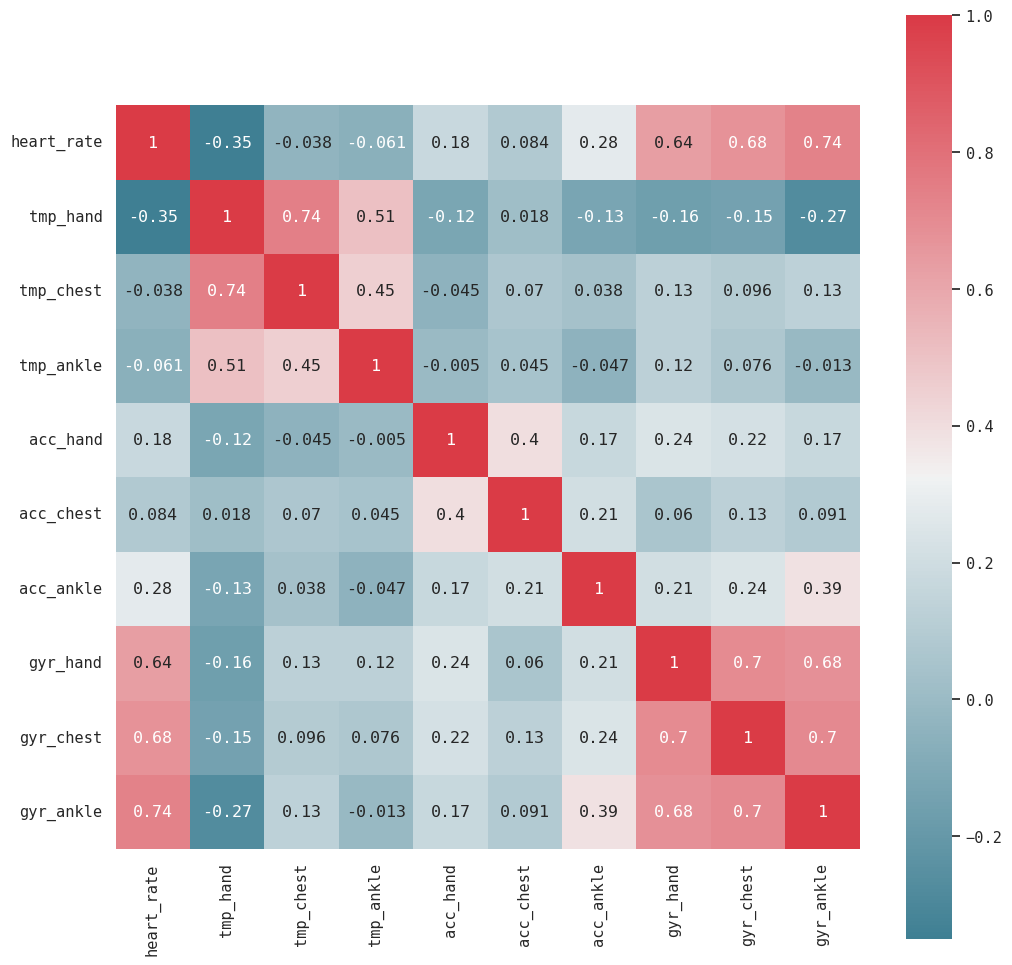

In [39]:
#We previously saw a heatmap using Seaborn to display the same correlation data frame.

sn.set(font = 'monospace')
df_train1_corr_matrix = df_train1.corr(method='spearman')

fig, axe = plt.subplots(figsize=(12,12))
cmap = sn.diverging_palette(220,10,center = "light", as_cmap=True)

sn.heatmap(df_train1_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

Let us now test our hypothesis after conducting extensive exploratory data analysis.

# **Hypothesis Testing**

**Hypothesis testing**

1a)
**If** angular velocity of the ankle is higher for higher Heart Rate, **then** Heart Rate should be higher for higher angular velocity of the ankle.


Null Hypothesis

H0: Correlation is equal to 0.

Alternate Hypothesis

H1: Correlation is greater than 0.

Because the data is not normally distributed, I am using the spearmanr method from the scipy.stats module to test my hypothesis on correlation.

In [40]:
#My correlation Hypothesis testing function
def hypothesis_testing_corr(data1,data2):
  correlation,p_value = spearmanr(data1,data2)#spearmanr gives correlation and p_value as output
  print('correlation between the parameters = {}'.format(correlation))#prints the correlation
  print('p_value = {}'.format(p_value))#prints the p-value
  for i in [0.01 , 0.05, 0.1]:
      if p_value < i:
        print('The null Hypothesis H0 is rejected at a confidence interval of {}%'.format(100 -i*100))
        break

      else:
        print('Failed to reject the null Hypothesis at {}% of confidence interval'.format(100-i*100))

In [41]:
hypothesis_testing_corr(df_test['gyr_ankle'],df_test['heart_rate']) #calling hypothesis function on the angular velocity and heart rate data

correlation between the parameters = 0.731430460008059
p_value = 0.0
The null Hypothesis H0 is rejected at a confidence interval of 99.0%


The above hypothesis testing shows that the association between the parameters heart rate and ankle angular velocity is positively correlated and statistically significant.

**Hypothesis testing**

1b)
**If** the angular velocity of the hand is higher for a higher heart rate,**then** the heart rate will be higher as well.


Null Hypothesis

H0: Correlation is equal to 0.

Alternate Hypothesis

H1: Correlation is greater than 0.

Because the data are not normally distributed, I am also employing the spearmanr approach for hypothesis testing.

In [42]:
hypothesis_testing_corr(df_test['gyr_hand'],df_test['heart_rate'])#calling hypothesis function 

correlation between the parameters = 0.6310230405790714
p_value = 0.0
The null Hypothesis H0 is rejected at a confidence interval of 99.0%


The above hypothesis testing shows that the correlation between the angular velocity of the hand and heart rate is positive and statistically significant.



Based on both hypothesis tests, we can conclude that, in general, the higher the angular velocity of a person's limbs (that is, more vigor of hand and leg movement), the person's heart rate will be higher.

# **Modelling**

Our goal is to assist in the development of hardware/software for detecting a person's activity. To do so, we must create and test a model that can be used to anticipate a person's activities based on sensor data.



Using an accelerometer, a heart rate measuring device, a gyroscope, and a thermometer

In [43]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.svm import SVC #importig svm model

In [44]:
#Shuffling the data set
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [45]:
#Dropping timestamp and subject id
df_final3 = df_final2.drop(['timestamp','SubjectID'],axis = 1)

In [46]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features dataframe
df_target = df_final3['activity_id']#target

In [47]:
scaler = RobustScaler()#Because the data is skewed and not regularly distributed, a robust scaler is used.
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)#test train split
X_train = scaler.fit_transform(X_train)#scaling the train data
X_test = scaler.transform(X_test)#Using the same scalar object, scale the train data.

In [48]:
def get_metrics (y_true,y_pred):#function for calculating data accuracy, precision, recall, and F1 score
    acc = accuracy_score(y_true, y_pred)
    
    p = precision_score(y_true, y_pred,average=None).mean()#average precision 
    r = recall_score(y_true, y_pred, average=None).mean()#average recall
    f1 = f1_score(y_true, y_pred, average=None).mean()#average f1 score
   
    print("Accuracy:  ",acc)
    
    print("Precision: ", p)
    print("Recall:    ", r)
    print("F1:        ", f1)

In [49]:
#function to show the confusion matrix
def show_Confusion_matrix(y_true,y_predicted):  
  cm = confusion_matrix(y_true,y_predicted)
  plt.rcParams['figure.figsize'] = (18,10)#setting the scale to get bigger display
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = list_activities)
  disp.plot(xticks_rotation= 'vertical',cmap = 'binary' )
  plt.show()

Because the model has a large number of features, it may take a long time to accomplish training and testing. However, we can use PCA (principle component analysis) to project and minimize the dimension of the features, potentially reducing the training and test time.

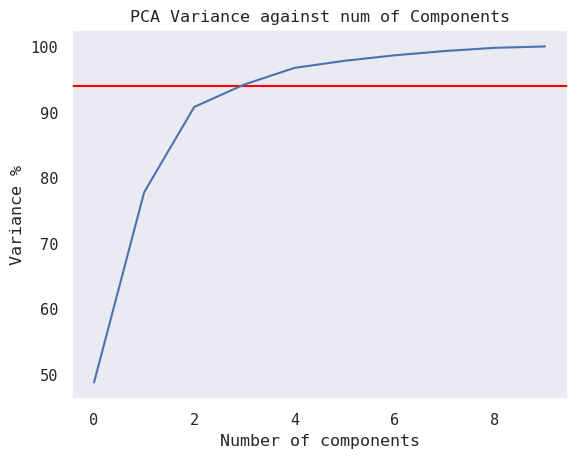

In [50]:
from sklearn.decomposition import PCA #importing PCA from Sklearn
pca = PCA()
pca.fit(X_train)#fitting the train data
var= pca.explained_variance_ratio_ # explains the amount of variance captured by the number of components
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Components")
plt.ylabel("Variance %")
plt.xlabel("Number of components")
l = plt.axhline(94, color="red")# The intersection of the line and the curve will tell us how many components we need to evaluate in order to capture 94% of the variance.

plt.plot(var1)
plt.grid()

We can see from the graph above that both lines intersect at x = 3, implying that we only need three features to capture 94% of the variation in our data. 

In [51]:
pca = PCA(n_components=3)# creating PCA object for 3 features
X_train=pca.fit_transform(X_train)#fitting X_train
X_test=pca.transform(X_test)#using the same pca object to transform X_test

In [52]:
X_train_df = pd.DataFrame(X_train,columns=['PCA_1','PCA_2','PCA_3' ])#the columns show the 3 columns created by the PCA object
X_train_df

,PCA_1,PCA_2,PCA_3
0,-0.672502,0.823953,1.391981
1,2.259840,2.435209,-1.885466
2,-1.163559,-0.975399,-0.648164
3,-1.668698,-0.719334,-0.414545
4,-1.696680,-0.139937,1.005519
...,...,...,...
133422,-1.296752,-0.892497,-0.470731
133423,-1.227306,-0.497782,0.118455
133424,4.783846,8.569231,-1.649441
133425,-0.281223,-1.076797,0.345656


In [53]:
from sklearn.svm import SVC

In [54]:
%%time
SVCmodel = SVC(kernel = 'rbf')
SVCmodel.fit(X_train, y_train)

Wall time: 13min 58s


SVC()

It can be observed that the SVC model takes 14 mins to train the data with PCA approach

In [55]:
%%time
SVCmodel_y_pred = SVCmodel.predict(X_test)
print(len(SVCmodel_y_pred))
print(len(y_test))
print(SVCmodel_y_pred[0:5])
print(y_test[0:5])

33357
33357
[ 3 16 13 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64
Wall time: 6min 39s


Also it takes 6 mins to test the data with PCA

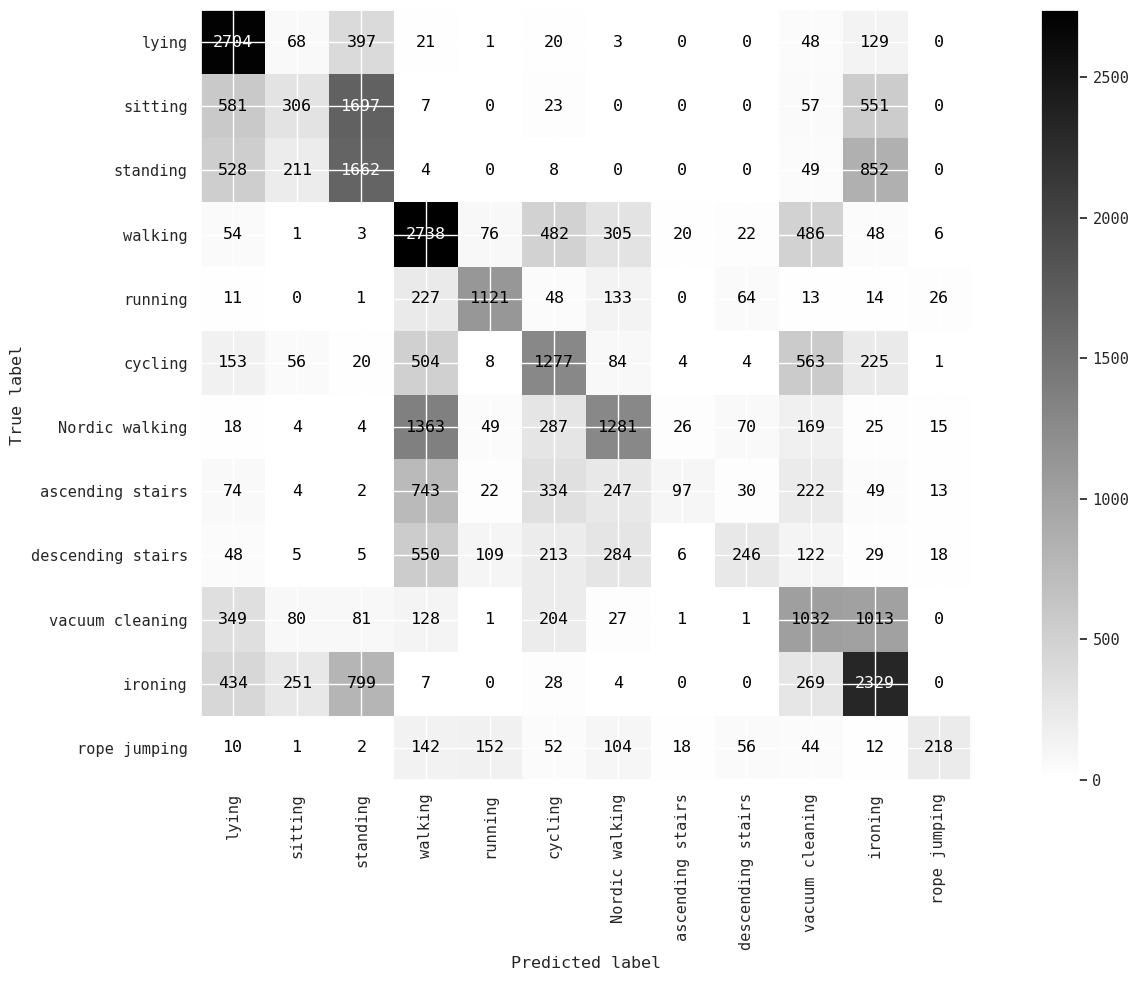

In [56]:
#shows the confusion matrix
show_Confusion_matrix(y_test,SVCmodel_y_pred)

In [57]:
get_metrics(y_test,SVCmodel_y_pred)

Accuracy:   0.4500104925502893
Precision:  0.49048004943185575
Recall:     0.41116677006007385
F1:         0.40519466496878054


Here, we use the SVM model with PCA, and the results are pretty poor. Let us investigate whether this is due to the PCA's implementation. 

**SVC model without using PCA**

In [58]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [59]:
df_final3 = df_final2.drop(['timestamp','SubjectID'],axis = 1)#dropping

In [60]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target

In [61]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
%%time
SVCmodel = SVC(kernel = 'rbf')#Eusing svm model
SVCmodel.fit(X_train, y_train)

Wall time: 6min 31s


SVC()

 We can observe that the SVC model only took 6 minutes to fit and train. And it completes quicker than it did when we used the PCA. This observation came as a surprise.

In [63]:
%%time
SVCmodel_y_pred = SVCmodel.predict(X_test)
print(len(SVCmodel_y_pred))
print(len(y_test))
print(SVCmodel_y_pred[0:5])
print(y_test[0:5])

33357
33357
[ 2  6 13 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64
Wall time: 5min 17s


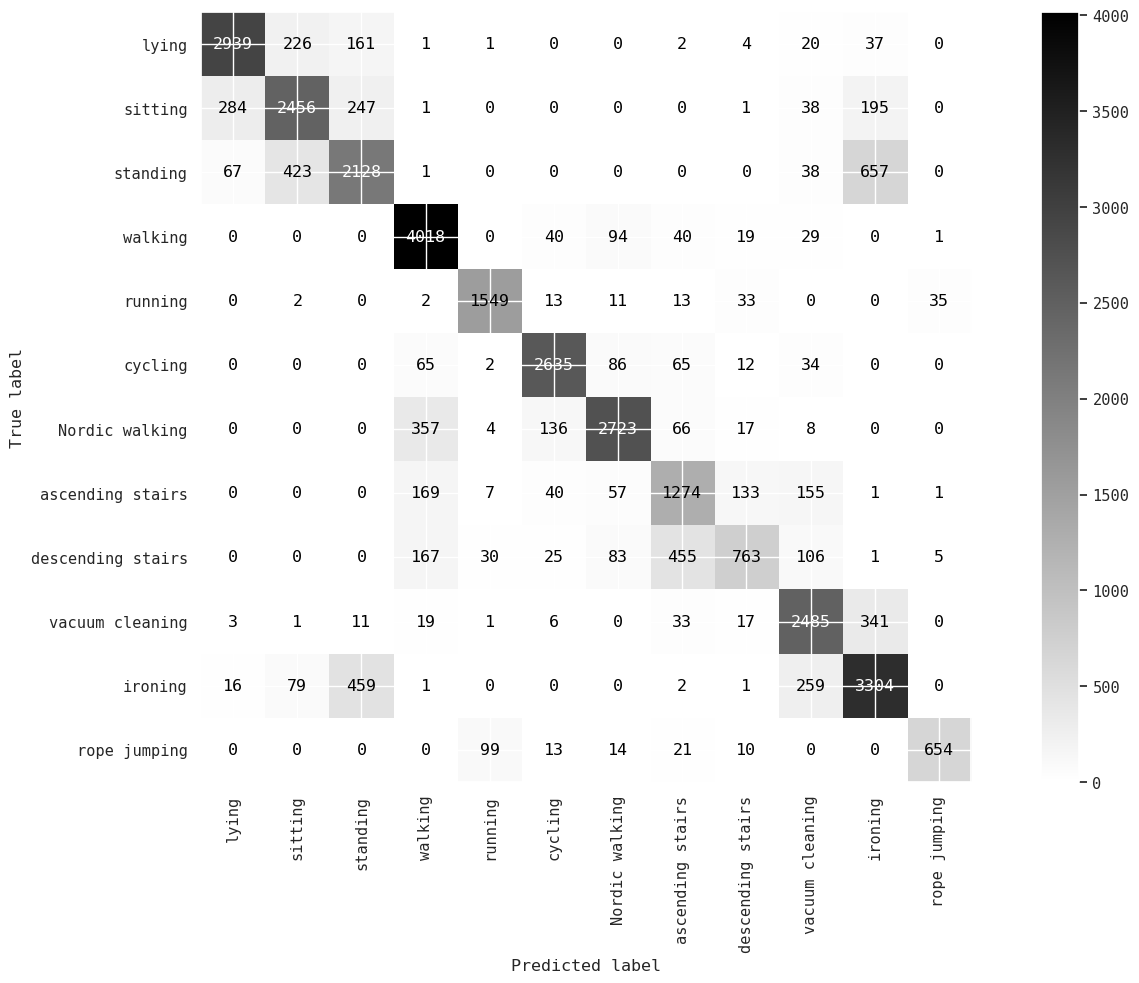

In [64]:
show_Confusion_matrix(y_test,SVCmodel_y_pred)

In [65]:
get_metrics(y_test,SVCmodel_y_pred)# to get the score

Accuracy:   0.8072668405432143
Precision:  0.8137950257204051
Recall:     0.7920300483464487
F1:         0.7987669102701833


We acquire an accuracy of 80.72 percent without applying dimensionality reduction with PCA, which is a very substantial difference.

As a result, I will not utilize PCA in this scenario because PCA slows down the model as it produces bad results

In [66]:
from sklearn.ensemble import RandomForestClassifier #Using RandomForest model for classification 

In [67]:
%%time
RFmodel = RandomForestClassifier()#creating the model object
RFmodel.fit(X_train,y_train)

Wall time: 31.4 s


RandomForestClassifier()

RandomForestClassifier only takes 31 seconds to trian our model where as SVM model took almost 6 mins.

In [68]:
RFmodel_y_pred = RFmodel.predict(X_test)#predictions
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#to compare the first 5 predictions
print(y_test[0:5])

33357
33357
[ 2  6 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


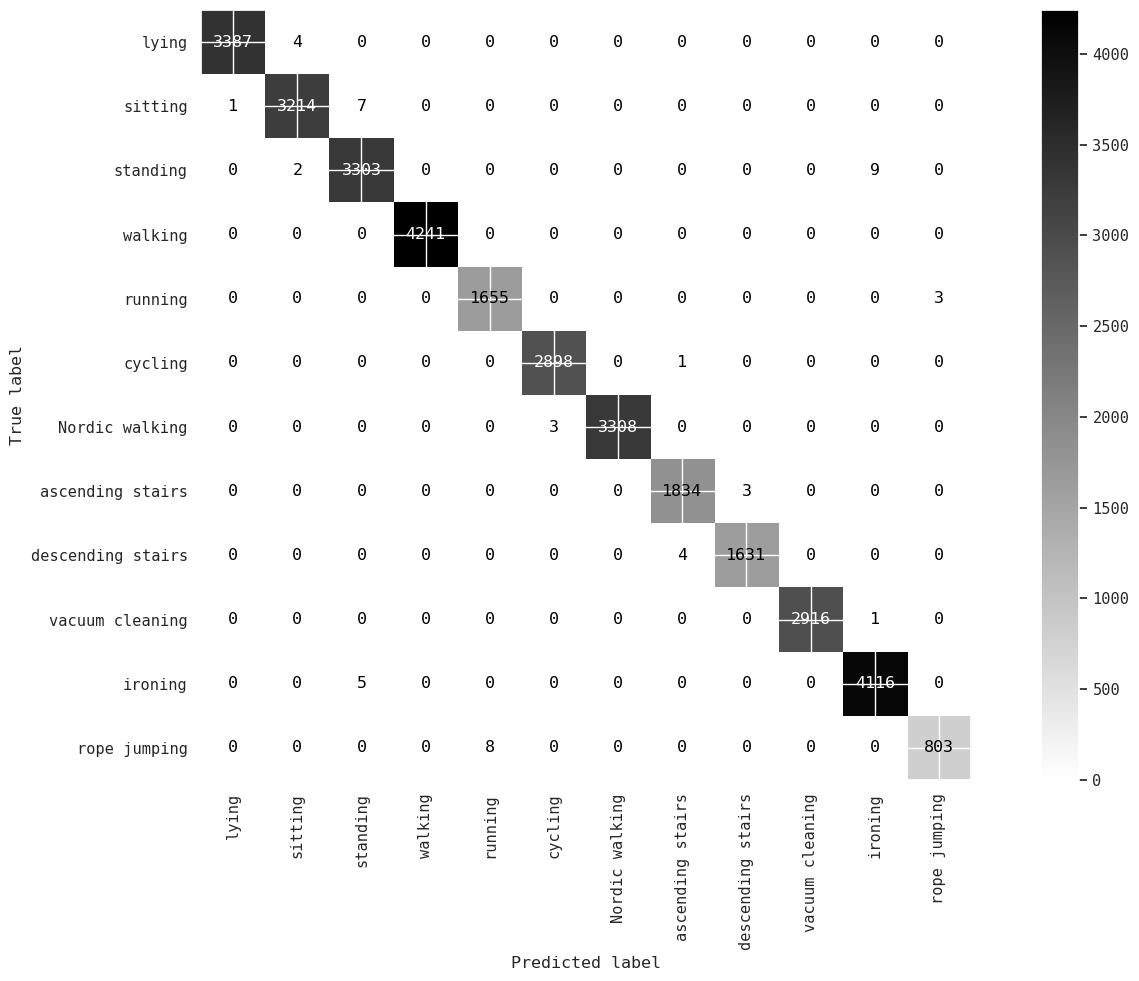

In [69]:
#showing the confusion matrix
show_Confusion_matrix(y_test, RFmodel_y_pred)


In [70]:
get_metrics(y_test,RFmodel_y_pred)

Accuracy:   0.9984710855292742
Precision:  0.9981396895105301
Recall:     0.9978714781665986
F1:         0.9980044855547248


By using all of the sensor data as input, the RandomForestModel achieves virtually flawless scores (accuracy = 99.85%).



Using a heart rate monitor, an accelerometer, and a thermometer.

In [71]:
df_final3= df_final2.drop(['SubjectID','timestamp','gyr_hand','gyr_chest','gyr_ankle'],axis = 1)#dropping gyroscope data

In [72]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features
df_target = df_final3['activity_id']#target

In [73]:
scaler = RobustScaler()#standardizing non normal data
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [75]:
RFmodel_y_pred = RFmodel.predict(X_test)#making prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#compare the first five results
print(y_test[0:5])

33357
33357
[ 2  6 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


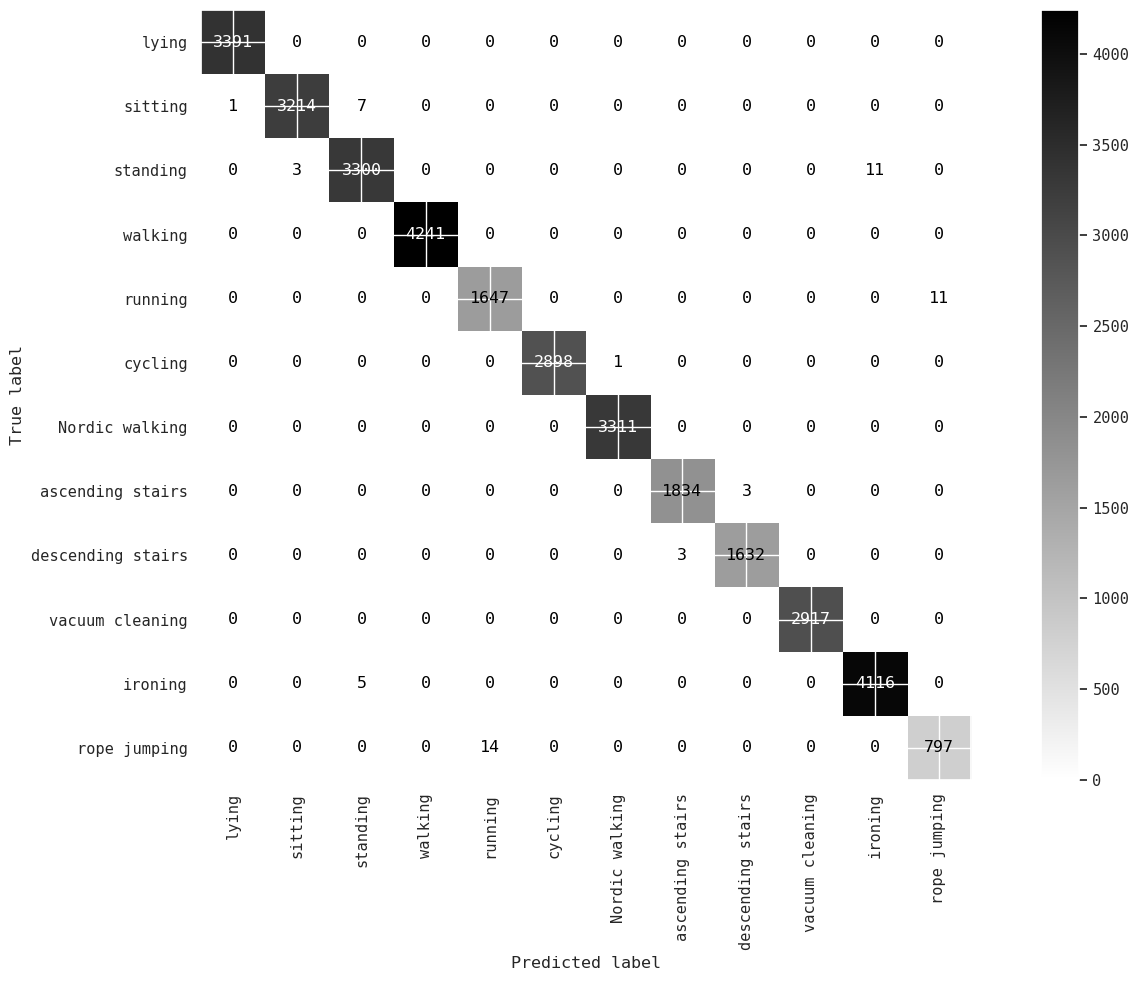

In [76]:
show_Confusion_matrix(y_test, RFmodel_y_pred)

In [77]:
get_metrics(y_test,RFmodel_y_pred)#gt the scores

Accuracy:   0.998231255808376
Precision:  0.9972226390869969
Recall:     0.9970307688177221
F1:         0.9971262467375855


Even so, we have a very high score (accuracy = 99.82%), which is little lower than if we used all the sensors. However, we can see from the confusion matrix that many rope jumping activities are now labelled as running in the absence of gyroscope sensor data.

So, if a person is extremely physically active, avoiding the gyroscope sensor is not a good idea because it would mislabel the heavy activities.

However, if the user does not engage in many heavy activities that require rapid limb motions, we do not need to include a gyroscope in the hardware.

**Without using temperature sensor**

In [78]:
df_final3= df_final2.drop(['SubjectID','timestamp','tmp_hand','tmp_chest','tmp_ankle'],axis = 1)#removing temperature data

In [79]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features
df_target = df_final3['activity_id']#target

In [80]:
scaler = RobustScaler()# for standardizing
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [82]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 3  6 13 17  3]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


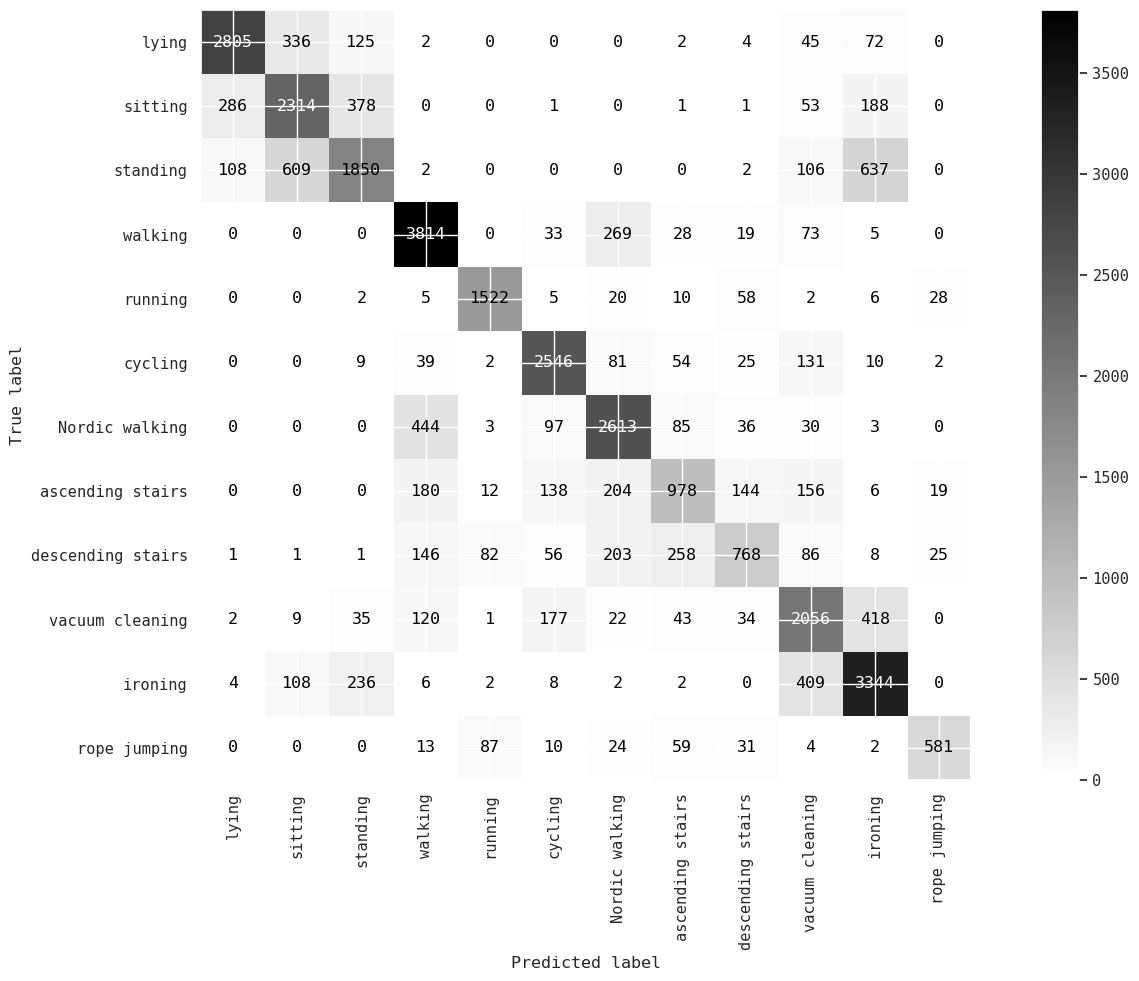

In [83]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [84]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.7551938123932008
Precision:  0.7599222277115733
Recall:     0.7352606048855109
F1:         0.7432612033746445


So, based on the observations above, we may conclude that removing the temperature sensor reduces the model's ability to correctly identify the activities.

As a result, the usage of a temperature sensor in the hardware is required.

Wearing sensors in every region of the body is not possible right now since we are trying to develop hardware that can classify activities.
As a result, we should place the device on either the hand or the ankle.
If we solely consider the convenience of these two positions, it should be placed in the hand.

However, we should still see if there is a significant difference in accuracy between the two positions.

**Hardware placed on Hand**

In [85]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [86]:
df_final3 = df_final2.drop(['timestamp','SubjectID','acc_chest','acc_ankle','tmp_chest','tmp_ankle','gyr_chest','gyr_ankle'],axis = 1)#dropping sensor datas from chest and ankle

In [87]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target

In [88]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [90]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 2  6 17 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


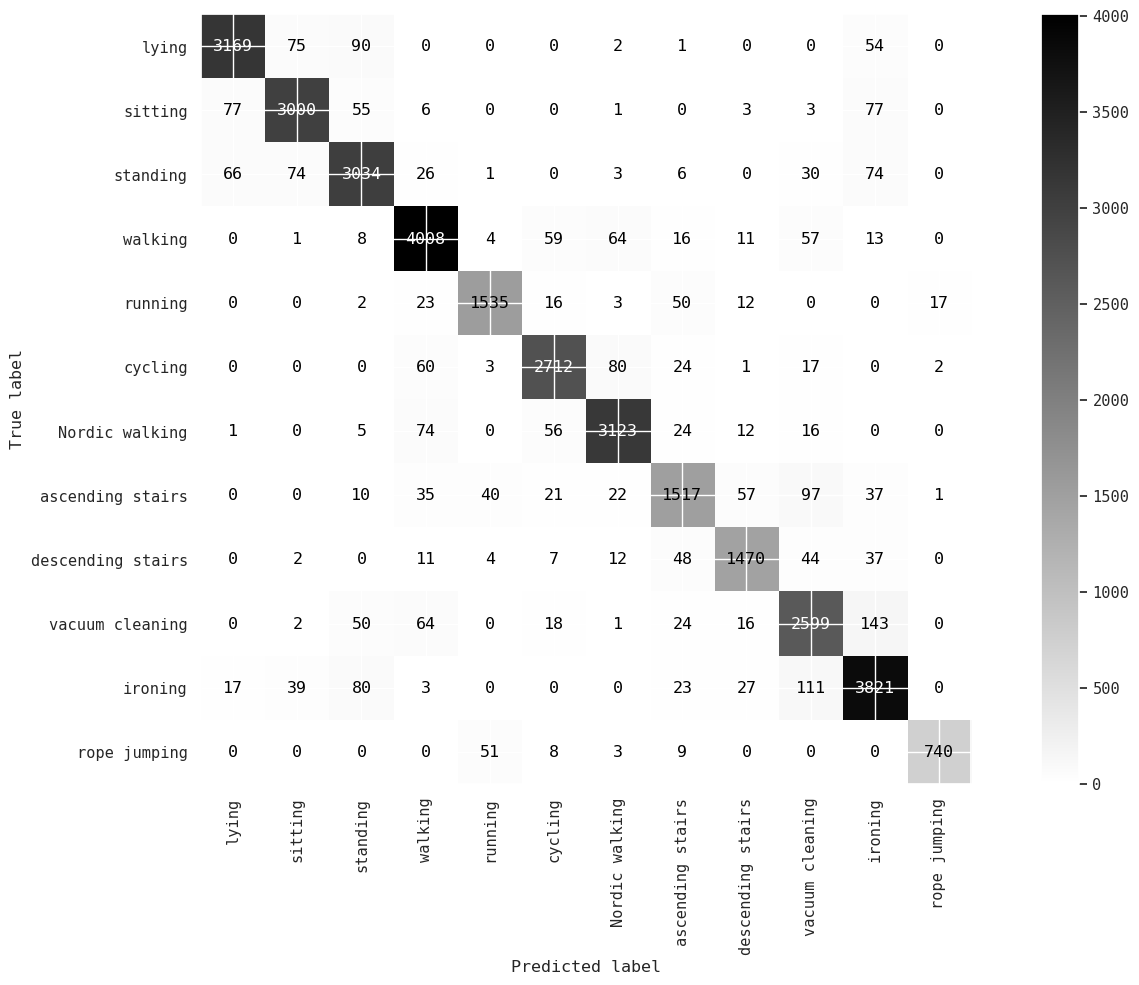

In [91]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [92]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.9211859579698414
Precision:  0.9230510107070518
Recall:     0.9155212886127773
F1:         0.9191053077383833


After modeling, we discovered that if the hardware is designed to wear in hand using a random forest model, we can achieve a high level of accuracy $(92.12)$.

**Hardware placed on ankle**

In [93]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [94]:
df_final3 = df_final2.drop(['timestamp','SubjectID','acc_chest','acc_hand','tmp_chest','tmp_hand','gyr_chest','gyr_hand'],axis = 1)#dropping sensor data from chest and hand

In [95]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target

In [96]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [98]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 2  7 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


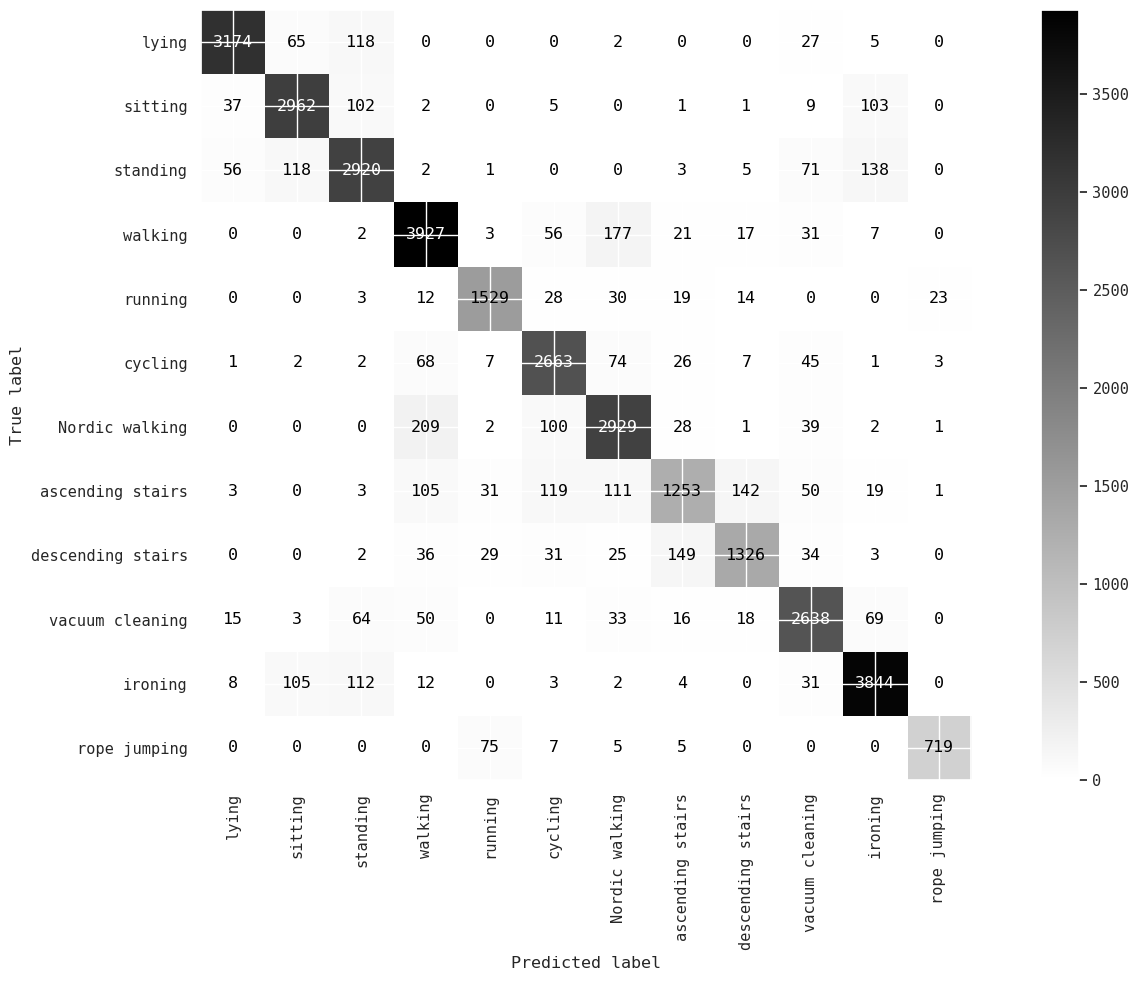

In [99]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [100]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.8958839224150853
Precision:  0.8958485356511808
Recall:     0.8837162188472636
F1:         0.8889273659317029


Based on the above modeling with the random forest model, we can conclude that placing the hardware in the ankle will have an accuracy of $89.6$. which is less than when the hardware is readily available $(92.18)$.

As a result, I recommend that the hardware be made in such a way that it can be worn in the person's hand.

# **Conclusion**

The PAMAP2 Physical Activity Monitoring dataset has been evaluated, and numerous insights have been gained. Different sensor data is modified in such a way that the sensor data as a whole can be utilized as features to aid in the development of hardware/software that can forecast the person's activity out of the 12 protocol activities.

To ensure that the results of our exploratory data analysis are statistically significant, we conduct hypothesis testing on the test data set.

Finally, a very good model RandomForestClassifier, which requires very little time to calculate the accuracy and has a very high accuracy when classifying the activities in the test data set when compared to SVM (support vector machine model).

My final conclusion is that if commercial hardware is required to categorise activities, the RandomForestClassifier should be used, and the hardware should be designed to be worn in hand.

**References**:

1.Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

2.poseMethod Technique:Analysis of usain bolt's running technique Available at: https://posemethod.com/usain-bolts-running-technique/

3.world Jump Rope records Avalilable at:https://jumpropehub.com/world-jump-rope-record/

4.Talk accelerometer Available at:https://en.wikipedia.org/wiki/Talk%3AAccelerometer.

5.https://www.kaggle.com/code/kirankarthikeyan/physical-activity-monitoring-using-imu/notebook#Exploratory-Data-Analysis-(EDA)

6.https://github.com/malancinas/Physical-Activity-Monitoring/blob/main/Physical%20Activity%20Monitoring.ipynb

7.https://github.com/Pushpa-NB/The-PAMAP2-Physical-Activity-Monitoring-dataset-/blob/main/Report2-DS-244870.ipynb